# Motivation

The dataset is 12000 questions posted on the forum for programming "Stack Overflow". Here, everyone can post questions regarding programming matters, at any level of programming - from enthusiasts to professionals. The users can vote questions and answers up and down. We want to take a closer look at questions with exceptionally high score. We expect these questions to resemble very core problems a user of the site can have. Using these questions, we wan't to try and define very popular topics on the site. This is both done by seeing if we can characterize the problems (questions) and by examining the discussions had when answering these (the body/answers to the question). We don't look into the score of the answers, but this matters less as in general questions with good scores have good answers, and we rather wan't to look at the discussion in the answers rather than the answer itself. There are a lot of very competent programmers using the site, and popular questions would without a doubt not go un-answered for long. 

We wanted to have a closer look on Stack Overflow, as it is something we as software technology students use quite often. It is an extremely helpful tool with a vast amount of information. If someone had the same problem as you before, its probably on Stack Overflow, and why not consult the very powerfool tool the internet is, when you need help. 

The goal is in a broad perspective to be able to show what is popular on Stack Overflow and characterize it. More specifically, we want to display what it is actually people need help with, and in what topics. When someone looks at our project, and if they're exposed to the programming world, the hope is that they recognize what languages/topics/question tags we've been trying to examine, from just looking at the words we will put on display through wordclouds and something we call word wheels. Then we want to justify examining exactly these topics and display how different topics are connected on Stack Overflow using both a network of questions and a network of tags. Popularity will in specific be looked at with a temporal perspective. Questions we've asked outselves is e.g. if some topics have been very popular in the past just to fall completely out of favor or does topics typically stay relevant? The computing world is very dynamic, but maybe the tools within doesn't change. The answers to these questions are what we wish to provide the reader. 

# Basic stats

Right of the bat we didn't do too much processing of the data. Much of what we wanted to use was very easily accessed through the json files themselves as items. However we did trim the tag lists as we created a list of all tags at the same time we got all jsons together and by year. The tag list was trimmed so similar tags would become the same (xcode-11 and xcode-14 should just be xcode) and duplicates were removed. 

Further processing happens as it is required for certain tasks - using the bodies for wordclouds and titles for text wheels. 

We have 12000 questions, which is down from 24000 as initially stated due to much better computing times. The additional questions seemed unneccesary, and 100 per month for 10 years just feels better than 200 per month, or 100 every half month. The questions contain 

The dataset is pulled from the StackExchange API (https://api.stackexchange.com/). It consists of the top 100 questions every month, based on score in descending order for the last 10 years. The API only allows pulling 100 questions at a time, which is why we pull for every month and not e.g. per year. The data is stored as a json object where the values from the tags, score, title and body keys is used for further processing. The body contains answers to the question.

The datasize is 33.4 mb. 

In [7]:
import urllib.request
import json
import gzip
import shutil
import re
from collections import Counter
import matplotlib.pylab as plt
import numpy as np
import networkx as nx
from fa2 import ForceAtlas2
import community
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import pandas as pd
from os import path


# Data download

First of all we need data about Stack Overflow questions, retrieved from Stack Exchange. We go back 10 years with 100 questions each month for a total of 12000 questions. 

In [8]:
#list of jsons
jsons = []

#All tags w. duplicates
allTags = []

#List of lists. Each year is a list inside.
yearList = []


# variables
oneYear=86400*365
month=int(oneYear/12)
todate=1572998400
fromdate=todate-month

# 10 years back
for i in range(1,11):
    #print("i",i)
    year = []
    #Each month
    for ii in range (1,13):
        #print("ii", ii)
        #print("todate",todate,"fromdate",fromdate)
        #Query for stackexchange
        query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate={}&todate={}&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y".format(fromdate,todate)
        response = urllib.request.urlopen(query)
        gzipFile = gzip.GzipFile(fileobj=response)
        src = gzipFile.read()
        stackjson = json.loads(src)
        #save json
        jsons.append(stackjson)
        #get each tag and save it 
        for question in stackjson['items']:
            #remove duplicate from tags after a trimming (['c', 'c-v12.1']) trim-> (['c', 'c']) remove-> (['c'])
            taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
            allTags.extend(list(dict.fromkeys(taglist)))
            year.extend(list(dict.fromkeys(taglist)))
        todate-=month
        fromdate-=month
    yearList.append(year)

## Tag popularity

In [162]:
# Counter dictionary for all tags
tagDict = Counter(allTags)
print("Number of unique: ",len(list(tagDict.keys())))
print("Number of tags from all questions: ", len(allTags))

Number of unique:  4689
Number of tags from all questions:  35883


First we wish to find the most popular subjects on Stack Overflow. We do this by taking each questions tags and grouping them together. Here we count the number of occurences and we find the following results:

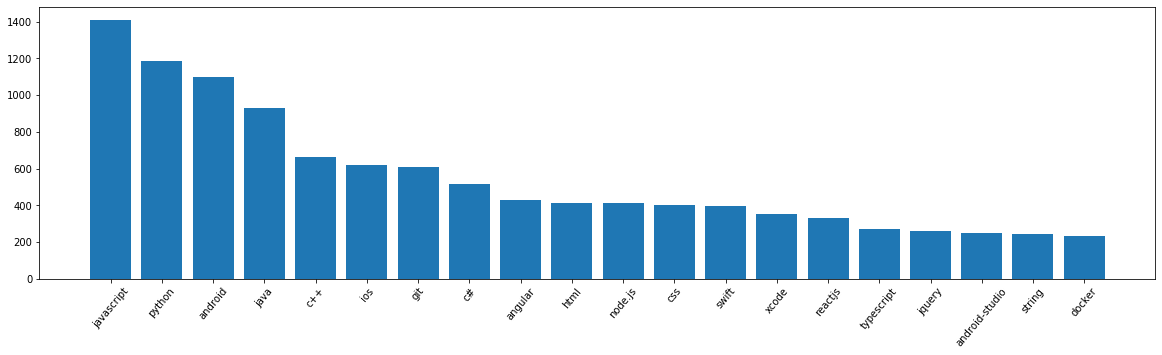

In [8]:
# Sort tags by number of occurences
sorted_x = sorted(tagDict.items(), key=lambda kv: kv[1], reverse=True)
n_items = sorted_x[0:20]
x, y = zip(*n_items) # unpack a list of pairs into two tuples
plt.figure(figsize=(20,5))
plt.bar(x, y)
plt.xticks(rotation=50)
plt.show()

There is a very clear top 4, and an even more clear winner; Javascript. Javascript appears approximately 1400 times in the 12000, meaning 12% of all questions are about Javascript. Interestingly android has twice the number of tags of ios, finally settling the debate about which is the most popular mobile operating system. However, this is more likely due to android being easier accessible to new programmers.

But how have these subjects popularity developed over time? We investigate the 6 most popular tags of all time, and see their development through the last 10 years.

In [ ]:
#Tags per year
tags2019 = yearList[0]
tags2018 = yearList[1]
tags2017 = yearList[2]
tags2016 = yearList[3] 
tags2015 = yearList[4]
tags2014 = yearList[5]
tags2013 = yearList[6]
tags2012 = yearList[7]
tags2011 = yearList[8]
tags2010 = yearList[9]

#Dict pr. year
tags2019dict = Counter(tags2019)
tags2018dict = Counter(tags2018)
tags2017dict = Counter(tags2017)
tags2016dict = Counter(tags2016)
tags2015dict = Counter(tags2015)
tags2014dict = Counter(tags2014)
tags2013dict = Counter(tags2013)
tags2012dict = Counter(tags2012)
tags2011dict = Counter(tags2011)
tags2010dict = Counter(tags2010)


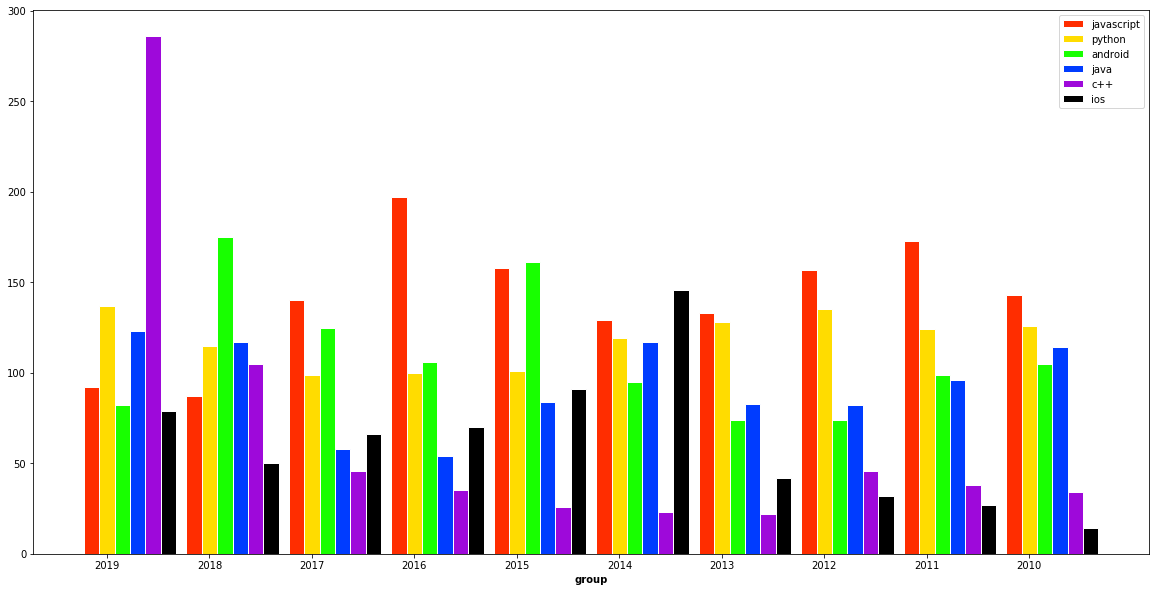

In [9]:
plt.figure(figsize=(20,10))

# set width of bar
barWidth = 0.15

# x-values for the plots
barsWord1 = [tags2019dict[x[0]], tags2018dict[x[0]], tags2017dict[x[0]], tags2016dict[x[0]], tags2015dict[x[0]], tags2014dict[x[0]], tags2013dict[x[0]], tags2012dict[x[0]], tags2011dict[x[0]],tags2010dict[x[0]]]
barsWord2 = [tags2019dict[x[1]], tags2018dict[x[1]], tags2017dict[x[1]], tags2016dict[x[1]], tags2015dict[x[1]], tags2014dict[x[1]], tags2013dict[x[1]], tags2012dict[x[1]], tags2011dict[x[1]],tags2010dict[x[1]]]
barsWord3 = [tags2019dict[x[2]], tags2018dict[x[2]], tags2017dict[x[2]], tags2016dict[x[2]], tags2015dict[x[2]], tags2014dict[x[2]], tags2013dict[x[2]], tags2012dict[x[2]], tags2011dict[x[2]],tags2010dict[x[2]]]
barsWord4 = [tags2019dict[x[3]], tags2018dict[x[3]], tags2017dict[x[3]], tags2016dict[x[3]], tags2015dict[x[3]], tags2014dict[x[3]], tags2013dict[x[3]], tags2012dict[x[3]], tags2011dict[x[3]],tags2010dict[x[3]]]
barsWord5 = [tags2019dict[x[4]], tags2018dict[x[4]], tags2017dict[x[4]], tags2016dict[x[4]], tags2015dict[x[4]], tags2014dict[x[4]], tags2013dict[x[4]], tags2012dict[x[4]], tags2011dict[x[4]],tags2010dict[x[4]]]
barsWord6 = [tags2019dict[x[5]], tags2018dict[x[5]], tags2017dict[x[5]], tags2016dict[x[5]], tags2015dict[x[5]], tags2014dict[x[5]], tags2013dict[x[5]], tags2012dict[x[5]], tags2011dict[x[5]],tags2010dict[x[5]]]


# Set position of bar on X axis
r1 = np.arange(len(barsWord1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]

 
# Make the plot
plt.bar(r1, barsWord1, color='#FF2D00', width=barWidth, edgecolor='white', label=x[0])
plt.bar(r2, barsWord2, color='#FFDC00', width=barWidth, edgecolor='white', label=x[1])
plt.bar(r3, barsWord3, color='#18FF00', width=barWidth, edgecolor='white', label=x[2])
plt.bar(r4, barsWord4, color='#003CFF', width=barWidth, edgecolor='white', label=x[3])
plt.bar(r5, barsWord5, color='#9E09DA', width=barWidth, edgecolor='white', label=x[4])
plt.bar(r6, barsWord6, color='#000000', width=barWidth, edgecolor='white', label=x[5])

 
# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(barsWord1))], ['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

As can be seen from the bar plot, most of the tags fluctuate quite a bit. Especially c++ which tripples its amount of occurences in 2019. C++ has seen a resurgance the last few years(footnote 1), but unfortunately nothing explains a development this wild. This is likely due to a random outlier in our data, even if we have 3600 tags from 2019.

We also se python increase in popularity, this correlates well with the trend seen in larger datasets and analyses (see footnote 1 on the website).

Just to show that our data does infact portray the real world we show you reactjs' development throught the last 10 years.

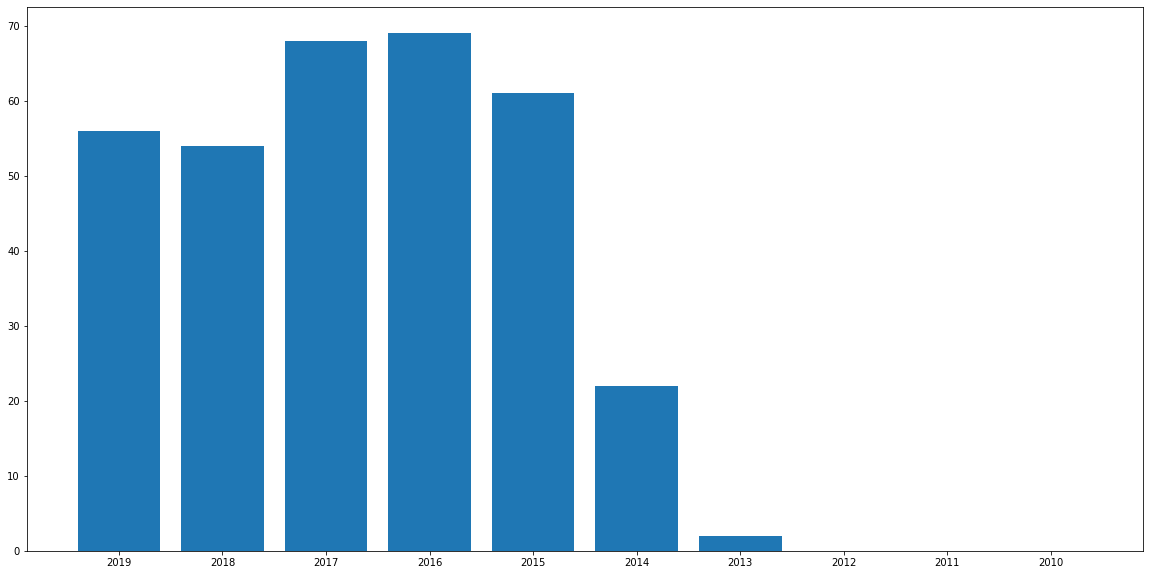

In [10]:
# Plot for reactjs
barsreact = [tags2019dict['reactjs'], tags2018dict['reactjs'], tags2017dict['reactjs'], tags2016dict['reactjs'], tags2015dict['reactjs'], tags2014dict['reactjs'], tags2013dict['reactjs'], tags2012dict['reactjs'], tags2011dict['reactjs'],tags2010dict['reactjs']]

plt.figure(figsize=(20,10))
plt.bar(['2019','2018','2017','2016','2015','2014','2013','2012','2011','2010'],barsreact)
plt.show()

As you may have guessed from the bar plot, reactjs was launched in 2013 by Facebook and has since quickly gained a lot of popularity.

Each question has one or more tags, where you can tag more subjects if your questions has correlation to more than one subject. We want to see which tags are well connected and which groups of tags may appear.

So we create a network of all the tags, and all edges between nodes whenever two or more tags have been tagged together in a question. We assume this means they have a sort of correlation, and give this attribute an edge.

Ex. `(['reacjs', 'nodejs', 'javascript']) -> [(reactjs---nodejs), (reactjs---javascript), (nodejs---javascript)]`.
Edges is denoted by `---`. 

# Tag network

In [175]:
network = nx.Graph()
network.add_nodes_from(list(dict.fromkeys(allTags)))
# Because we have to work on each questions tag-list, we have to use the saved jsons.
for json in jsons:
    for question in json['items']:
        # trimming of tags
        taglisthelper = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        # remove duplicates
        taglisthelper = list(dict.fromkeys(taglisthelper))
        for tag in taglisthelper:
            for tag2 in taglisthelper:
                network.add_edge(tag,tag2)

['ios', 'swift', 'xcode', 'uitextview', 'xcode']
['ios', 'swift', 'xcode', 'uitextview']
['bash', 'git', 'macos', 'zsh', 'macos-catalina']
['bash', 'git', 'macos', 'zsh', 'macos-catalina']
['xcode', 'macos', 'macos-catalina']
['xcode', 'macos', 'macos-catalina']
['c', 'scanf']
['c', 'scanf']
['python', 'boolean-logic']
['python', 'boolean-logic']
['c', 'linux', 'assembly', 'mmap']
['c', 'linux', 'assembly', 'mmap']
['python', 'tensorflow', 'keras', 'performance-testing', 'tensorflow']
['python', 'tensorflow', 'keras', 'performance-testing']
['ios', 'objective-c', 'wkwebview']
['ios', 'objective-c', 'wkwebview']
['c++', 'assembly', 'unique-ptr', 'calling-convention', 'abi']
['c++', 'assembly', 'unique-ptr', 'calling-convention', 'abi']
['android', 'cordova', 'ionic-framework', 'ionic', 'build.gradle']
['android', 'cordova', 'ionic-framework', 'ionic', 'build.gradle']
['python', 'python', 'list', 'tuples']
['python', 'list', 'tuples']
['ruby', 'floating-point', 'negative-zero']
['ruby', 

['arrays', 'performance', 'rust', 'llvm-codegen']
['arrays', 'performance', 'rust', 'llvm-codegen']
['android', 'android-studio', 'android-manifest']
['android', 'android-studio', 'android-manifest']
['c++', 'language-lawyer', 'c++', 'std-source-location']
['c++', 'language-lawyer', 'std-source-location']
['c++', 'language-lawyer', 'undefined-behavior']
['c++', 'language-lawyer', 'undefined-behavior']
['c++', 'compiler-optimization', 'undefined-behavior', 'division', 'divide-by-zero']
['c++', 'compiler-optimization', 'undefined-behavior', 'division', 'divide-by-zero']
['c++', 'macros']
['c++', 'macros']
['android', 'android-room', 'android-lifecycle']
['android', 'android-room', 'android-lifecycle']
['c++', 'tuples', 'language-lawyer', 'padding']
['c++', 'tuples', 'language-lawyer', 'padding']
['pointers', 'rust']
['pointers', 'rust']
['android', 'android-studio', 'gradle', 'android-ndk', 'synchronization']
['android', 'android-studio', 'gradle', 'android-ndk', 'synchronization']
['c++

['ios', 'ios-darkmode']
['c++', 'c', 'benchmarking']
['c++', 'c', 'benchmarking']
['c++', 'if-statement', 'c++']
['c++', 'if-statement']
['angular', 'typescript']
['angular', 'typescript']
['ios', 'ios', 'ios-darkmode']
['ios', 'ios-darkmode']
['xcode', 'testflight', 'fastlane', 'appstoreconnect']
['xcode', 'testflight', 'fastlane', 'appstoreconnect']
['c++', 'c++', 'filesize', 'c++-standard-library']
['c++', 'filesize', 'c++-standard-library']
['c++', 'c++']
['c++']
['c++', 'templates', 'embedded', 'fault-tolerance']
['c++', 'templates', 'embedded', 'fault-tolerance']
['c++', 'algorithm', 'reference', 'stl', 'c++']
['c++', 'algorithm', 'reference', 'stl']
['xcode', 'xcode', 'xcode']
['xcode']
['android', 'google-api-java-client', 'google-developers-console']
['android', 'google-api-java-client', 'google-developers-console']
['c++', 'optimization', 'memory-alignment', 'memory-layout', 'struct-member-alignment']
['c++', 'optimization', 'memory-alignment', 'memory-layout', 'struct-member

['c++', 'c', 'casting', 'language-lawyer']
['c++', 'c', 'casting', 'language-lawyer']
['python', 'list']
['python', 'list']
['python', 'numpy', 'keras']
['python', 'numpy', 'keras']
['android-studio', 'android-studio']
['android-studio']
['javascript']
['javascript']
['python', 'random']
['python', 'random']
['ios', 'xcode']
['ios', 'xcode']
['c', 'performance', 'gcc', 'glibc']
['c', 'performance', 'gcc', 'glibc']
['java', 'generics', 'local-class']
['java', 'generics', 'local-class']
['c++', 'gcc', 'compilation', 'clang']
['c++', 'gcc', 'compilation', 'clang']
['scala', 'haskell', 'functional-programming', 'category-theory', 'monoids']
['scala', 'haskell', 'functional-programming', 'category-theory', 'monoids']
['reactjs', 'eslint', 'create-react-app', 'react-hooks']
['reactjs', 'eslint', 'create-react-app', 'react-hooks']
['reactjs', 'react-hooks']
['reactjs', 'react-hooks']
['android', 'gradle', 'groovy', 'android-gradle-plugin', 'build.gradle']
['android', 'gradle', 'groovy', 'andr

['asp.net-core', '.net-core', 'visual-studio', '.net-core', 'asp.net-core']
['asp.net-core', '.net-core', 'visual-studio']
['react-native']
['react-native']
['c#', 'c#', 'nullablereferencetypes']
['c#', 'nullablereferencetypes']
['c++', 'c++', 'iterator', 'std']
['c++', 'iterator', 'std']
['javascript', 'prototype']
['javascript', 'prototype']
['python', 'performance', 'numpy', 'x', 'cpu-cache']
['python', 'performance', 'numpy', 'x', 'cpu-cache']
['c++', 'arrays', 'pointers']
['c++', 'arrays', 'pointers']
['javascript']
['javascript']
['c', 'language-lawyer', 'increment', 'evaluation']
['c', 'language-lawyer', 'increment', 'evaluation']
['java', 'multithreading', 'macos', 'operating-system']
['java', 'multithreading', 'macos', 'operating-system']
['android', 'firebase', 'android-gradle-plugin']
['android', 'firebase', 'android-gradle-plugin']
['android', 'material-design', 'androidx']
['android', 'material-design', 'androidx']
['c++', 'exception-handling']
['c++', 'exception-handling'

['angular', 'build', 'production', 'ng-build']
['laravel', 'laravel', 'csrf-protection', 'laravel-passport', 'cookie-httponly']
['laravel', 'csrf-protection', 'laravel-passport', 'cookie-httponly']
['c++', 'language-lawyer']
['c++', 'language-lawyer']
['performance', 'java', 'java', 'microbenchmark', 'jmh']
['performance', 'java', 'microbenchmark', 'jmh']
['c#', 'asp.net-core', 'dependency-injection', '.net-core', 'ioc-container']
['c#', 'asp.net-core', 'dependency-injection', '.net-core', 'ioc-container']
['java', 'collections', 'java', 'java-stream']
['java', 'collections', 'java-stream']
['css', 'flexbox', 'language-lawyer', 'wc']
['css', 'flexbox', 'language-lawyer', 'wc']
['c++', 'function', 'c++', 'return-type', 'compile-time']
['c++', 'function', 'return-type', 'compile-time']
['python']
['python']
['algorithm']
['algorithm']
['python', 'python', 'parallel-processing', 'multiprocessing', 'python-multiprocessing']
['python', 'parallel-processing', 'multiprocessing', 'python-multi

['dart', 'flutter']
['dart', 'flutter']
['android-studio', 'intellij-idea']
['android-studio', 'intellij-idea']
['c++', 'iostream']
['c++', 'iostream']
['javascript', 'reactjs', 'jsx', 'react-hooks']
['javascript', 'reactjs', 'jsx', 'react-hooks']
['c#', 'visual-studio', 'asp.net-core']
['c#', 'visual-studio', 'asp.net-core']
['javascript']
['javascript']
['kotlin']
['kotlin']
['javascript', 'reactjs', 'react-hooks']
['javascript', 'reactjs', 'react-hooks']
['c++', 'templates', 'inheritance', 'lambda', 'overloading']
['c++', 'templates', 'inheritance', 'lambda', 'overloading']
['android', 'butterknife', 'androidx', 'android-jetifier']
['android', 'butterknife', 'androidx', 'android-jetifier']
['c++', 'operator-overloading']
['c++', 'operator-overloading']
['reactjs', 'react-router']
['reactjs', 'react-router']
['c++', 'exception', 'lambda']
['c++', 'exception', 'lambda']
['python', 'django', 'python', 'django-models']
['python', 'django', 'django-models']
['java', 'android', 'android-g

['ios', 'xcode']
['ios', 'swift', 'xcode', 'swift', 'xcode']
['ios', 'swift', 'xcode']
['c#', 'vb.net', 'loops', 'for-loop']
['c#', 'vb.net', 'loops', 'for-loop']
['xcode', 'upgrade']
['xcode', 'upgrade']
['flutter']
['flutter']
['typescript']
['typescript']
['reactjs', 'webpack', 'babeljs', 'babel']
['reactjs', 'webpack', 'babeljs', 'babel']
['azure-devops', 'azure-pipelines-release-pipeline']
['azure-devops', 'azure-pipelines-release-pipeline']
['android-workmanager']
['android-workmanager']
['xcode', 'macos', 'xcode', 'macos-mojave']
['xcode', 'macos', 'macos-mojave']
['java', 'eclipse', 'java', 'eclipse']
['java', 'eclipse']
['c++', 'c', 'floating-point', 'numbers', 'precision']
['c++', 'c', 'floating-point', 'numbers', 'precision']
['ios', 'app-store', 'appstoreconnect']
['ios', 'app-store', 'appstoreconnect']
['performance', 'sorting', 'haskell']
['performance', 'sorting', 'haskell']
['php', 'mysql', 'mysql']
['php', 'mysql']
['android', 'xml', 'android-studio']
['android', 'xml'

['android', 'android-livedata', 'mutablelivedata']
['android', 'android-livedata', 'mutablelivedata']
['java', 'try-catch']
['java', 'try-catch']
['npm']
['npm']
['c', 'arrays', 'pointers', 'pointer-arithmetic', 'errata']
['c', 'arrays', 'pointers', 'pointer-arithmetic', 'errata']
['c++', 'language-lawyer', 'c++', 'undefined-behavior', 'strict-aliasing']
['c++', 'language-lawyer', 'undefined-behavior', 'strict-aliasing']
['angular', 'angular', 'ngrx-store', 'state-management']
['angular', 'ngrx-store', 'state-management']
['c#', 'api']
['c#', 'api']
['c#', 'asp.net-core', 'visual-studio', 'nuget']
['c#', 'asp.net-core', 'visual-studio', 'nuget']
['android', 'android-navigation', 'android-jetpack']
['android', 'android-navigation', 'android-jetpack']
['spring', 'spring-boot', 'spring-batch']
['spring', 'spring-boot', 'spring-batch']
['java', 'arrays', 'core', 'modifier']
['java', 'arrays', 'core', 'modifier']
['java', 'lambda', 'java', 'functional-interface']
['java', 'lambda', 'functio

['android', 'testing', 'google-play', 'beta']
['c++', 'arrays', 'pointers', 'unary-operator']
['c++', 'arrays', 'pointers', 'unary-operator']
['java', 'mysql', 'eclipse', 'maven', 'spring-boot']
['java', 'mysql', 'eclipse', 'maven', 'spring-boot']
['c++', 'c++', 'initializer-list']
['c++', 'initializer-list']
['elasticsearch']
['elasticsearch']
['docker']
['docker']
['xcode', 'compile-time', 'build-system']
['xcode', 'compile-time', 'build-system']
['dart', 'flutter']
['dart', 'flutter']
['python', 'celery', 'celery-task']
['python', 'celery', 'celery-task']
['android', 'android-room', 'android-architecture-components', 'android-livedata', 'android-paging']
['android', 'android-room', 'android-architecture-components', 'android-livedata', 'android-paging']
['c++', 'string', 'c++']
['c++', 'string']
['python', 'regex', 'python']
['python', 'regex']
['ios', 'xcode', 'cocoapods']
['ios', 'xcode', 'cocoapods']
['regex', 'perl']
['regex', 'perl']
['typescript']
['typescript']
['docker', 'kv

['android', 'android-studio', 'android-gradle-plugin', 'gitignore']
['react-native']
['react-native']
['dart', 'flutter']
['dart', 'flutter']
['c++', 'language-lawyer', 'protected', 'access-specifier', 'member-pointers']
['c++', 'language-lawyer', 'protected', 'access-specifier', 'member-pointers']
['dart', 'flutter']
['dart', 'flutter']
['android', 'android-studio', 'kotlin', 'android-studio']
['android', 'android-studio', 'kotlin']
['instagram', 'instagram-api']
['instagram', 'instagram-api']
['c++', 'language-lawyer', 'c++', 'ternary-operator', 'implicit-conversion']
['c++', 'language-lawyer', 'ternary-operator', 'implicit-conversion']
['javascript', 'css', 'angular', 'animation', 'angular-animations']
['javascript', 'css', 'angular', 'animation', 'angular-animations']
['c++', 'pointers', 'memory', 'undefined-behavior']
['c++', 'pointers', 'memory', 'undefined-behavior']
['c#', 'performance', 'delegates', 'garbage-collection', 'closures']
['c#', 'performance', 'delegates', 'garbage-

['javascript', 'angular', 'ecmascript', 'angular-cli']
['linux', 'docker']
['linux', 'docker']
['c++', 'c', 'variables', 'negation', 'absolute-value']
['c++', 'c', 'variables', 'negation', 'absolute-value']
['c#', 'sorting', 'sortedset']
['c#', 'sorting', 'sortedset']
['jquery', 'html', 'css', 'file-upload', 'bootstrap']
['jquery', 'html', 'css', 'file-upload', 'bootstrap']
['asp.net-core-mvc', 'razor-pages']
['asp.net-core-mvc', 'razor-pages']
['angular', 'angular-reactive-forms']
['angular', 'angular-reactive-forms']
['reactjs', 'create-react-app']
['reactjs', 'create-react-app']
['reactjs', 'typescript', 'react-router']
['reactjs', 'typescript', 'react-router']
['javascript', 'jquery']
['javascript', 'jquery']
['python', 'numpy', 'tensorflow']
['python', 'numpy', 'tensorflow']
['sql', 'sql-server']
['sql', 'sql-server']
['ruby-on-rails', 'ruby', 'postgresql', 'bundler', 'rails-migrations']
['ruby-on-rails', 'ruby', 'postgresql', 'bundler', 'rails-migrations']
['javascript', 'github'

['angular']
['c#', '.net', 'access-modifiers', 'c#']
['c#', '.net', 'access-modifiers']
['java', 'rx-java', 'rx-java', 'java']
['java', 'rx-java']
['reactjs', 'react-router', 'react-router-v']
['reactjs', 'react-router', 'react-router-v']
['vue.js', 'vuejs']
['vue.js', 'vuejs']
['android', 'android-studio', 'android-gradle-plugin']
['android', 'android-studio', 'android-gradle-plugin']
['c', 'gcc', 'iso', 'c', 'c']
['c', 'gcc', 'iso']
['android', 'android-gradle-plugin']
['android', 'android-gradle-plugin']
['reactjs', 'react-props']
['reactjs', 'react-props']
['c++', 'constructor', 'language-lawyer', 'c++', 'protected']
['c++', 'constructor', 'language-lawyer', 'protected']
['angular', 'typescript', 'ionic-framework']
['angular', 'typescript', 'ionic-framework']
['javascript', 'html', 'ecmascript', 'es-modules']
['javascript', 'html', 'ecmascript', 'es-modules']
['dart', 'flutter', 'statefulwidget', 'statelesswidget']
['dart', 'flutter', 'statefulwidget', 'statelesswidget']
['c++', 'e

['macos', 'vagrant', 'virtualbox', 'macos-high-sierra']
['asp.net', 'angular', 'reactjs', 'razor']
['asp.net', 'angular', 'reactjs', 'razor']
['java', 'eclipse']
['java', 'eclipse']
['ios', 'swift', 'iphone-x', 'safearealayoutguide']
['ios', 'swift', 'iphone-x', 'safearealayoutguide']
['ios', 'swift', 'uinavigationbar', 'ios']
['ios', 'swift', 'uinavigationbar']
['swift', 'escaping', 'closures']
['swift', 'escaping', 'closures']
['angular', 'typescript', 'angular-httpclient']
['angular', 'typescript', 'angular-httpclient']
['ios']
['ios']
['kotlin', 'coroutine', 'kotlin-coroutines']
['kotlin', 'coroutine', 'kotlin-coroutines']
['xcode', 'autocomplete', 'xcode']
['xcode', 'autocomplete']
['firebase', 'google-cloud-firestore']
['firebase', 'google-cloud-firestore']
['javascript', 'angular']
['javascript', 'angular']
['python', 'python', 'pip', 'pipenv']
['python', 'pip', 'pipenv']
['ios', 'xcode', 'itunesconnect', 'ios', 'xcode']
['ios', 'xcode', 'itunesconnect']
['java', 'javafx']
['jav

['android', 'android-layout', 'android-view', 'android-constraintlayout']
['android', 'android-layout', 'android-view', 'android-constraintlayout']
['angular']
['angular']
['macos', 'docker', 'docker-for-mac']
['macos', 'docker', 'docker-for-mac']
['python', 'jupyter-notebook']
['python', 'jupyter-notebook']
['android-layout', 'android-studio', 'android-activity', 'kotlin']
['android-layout', 'android-studio', 'android-activity', 'kotlin']
['docker', 'ubuntu', 'ubuntu', 'apt-get']
['docker', 'ubuntu', 'apt-get']
['go', 'substring']
['go', 'substring']
['javascript', 'reactjs', 'webpack']
['javascript', 'reactjs', 'webpack']
['ios', 'swift', 'ios']
['ios', 'swift']
['jenkins']
['jenkins']
['angular', 'internet-explorer', 'angular-cli', 'compatibility', 'polyfills']
['angular', 'internet-explorer', 'angular-cli', 'compatibility', 'polyfills']
['python', 'pandas', 'numpy', 'dataframe']
['python', 'pandas', 'numpy', 'dataframe']
['uinavigationbar', 'uisearchbar', 'ios']
['uinavigationbar',

['android', 'android-studio', 'kotlin', 'android-databinding']
['android', 'crash', 'native', 'android-nougat', 'android-nougat']
['android', 'crash', 'native', 'android-nougat']
['amazon-web-services']
['amazon-web-services']
['android', 'crash', 'kotlin', 'android-studio', 'android-room']
['android', 'crash', 'kotlin', 'android-studio', 'android-room']
['amazon-web-services', 'amazon-s']
['amazon-web-services', 'amazon-s']
['javascript', 'reactjs', 'webpack', 'create-react-app']
['javascript', 'reactjs', 'webpack', 'create-react-app']
['ios', 'uicollectionview', 'autolayout']
['ios', 'uicollectionview', 'autolayout']
['nginx', 'kubernetes', 'load-balancing']
['nginx', 'kubernetes', 'load-balancing']
['java', 'spring', 'spring-boot', 'spring-data', 'spring-data-jpa']
['java', 'spring', 'spring-boot', 'spring-data', 'spring-data-jpa']
['xcode', 'git', 'macos', 'version-control', 'xcode-beta']
['xcode', 'git', 'macos', 'version-control', 'xcode-beta']
['android', 'android-studio', 'andr

['vue.js', 'vuejs', 'vue-cli']
['javascript', 'reactjs', 'cors', 'create-react-app', 'fetch-api']
['javascript', 'reactjs', 'cors', 'create-react-app', 'fetch-api']
['machine-learning', 'deep-learning', 'signal-processing', 'conv-neural-network', 'convolution']
['machine-learning', 'deep-learning', 'signal-processing', 'conv-neural-network', 'convolution']
['javascript', 'reactjs', 'react-router', 'react-router-v']
['javascript', 'reactjs', 'react-router', 'react-router-v']
['reactjs', 'react-router']
['reactjs', 'react-router']
['javascript', 'firebase', 'cors', 'google-cloud-functions']
['javascript', 'firebase', 'cors', 'google-cloud-functions']
['javascript', 'html', 'google-chrome', 'dom']
['javascript', 'html', 'google-chrome', 'dom']
['mysql', 'passwords']
['mysql', 'passwords']
['html', 'html', 'attributes', 'content-security-policy', 'nonce']
['html', 'attributes', 'content-security-policy', 'nonce']
['nuget', '.net-core', '.net-standard']
['nuget', '.net-core', '.net-standard

['java', 'spring', 'spring-mvc', 'servlets']
['machine-learning', 'cross-entropy']
['machine-learning', 'cross-entropy']
['css', 'twitter-bootstrap', 'css', 'bootstrap']
['css', 'twitter-bootstrap', 'bootstrap']
['reactjs', 'redux', 'react-redux']
['reactjs', 'redux', 'react-redux']
['c++', 'c']
['c++', 'c']
['javascript', 'node.js', 'promise', 'bluebird']
['javascript', 'node.js', 'promise', 'bluebird']
['css', 'bootstrap']
['css', 'bootstrap']
['python', 'xml', 'pandas', 'xslt', 'xpath']
['python', 'xml', 'pandas', 'xslt', 'xpath']
['java', 'json', 'kotlin']
['java', 'json', 'kotlin']
['java', 'linux', 'gradle', 'installation']
['java', 'linux', 'gradle', 'installation']
['java', 'hadoop', 'mapreduce', 'yarn']
['java', 'hadoop', 'mapreduce', 'yarn']
['android', 'android-studio']
['android', 'android-studio']
['asp.net-core', 'environment-variables', 'production-environment']
['asp.net-core', 'environment-variables', 'production-environment']
['nginx']
['nginx']
['tensorflow']
['tenso

['c++', 'binary', 'logic']
['c++', 'binary', 'logic']
['javascript', 'file']
['javascript', 'file']
['ios', 'swift', 'xcode', 'swift', 'modulus']
['ios', 'swift', 'xcode', 'modulus']
['amazon-web-services', 'amazon-ec', 'amazon-ecs']
['amazon-web-services', 'amazon-ec', 'amazon-ecs']
['angular', 'typescript']
['angular', 'typescript']
['angular', 'jasmine', 'angular-cli']
['angular', 'jasmine', 'angular-cli']
['angular', 'router']
['angular', 'router']
['c++', 'string']
['c++', 'string']
['python', 'macos', 'python', 'python', 'pip']
['python', 'macos', 'pip']
['rest', 'restful-authentication', 'graphql']
['rest', 'restful-authentication', 'graphql']
['python', 'machine-learning', 'tensorflow', 'keras']
['python', 'machine-learning', 'tensorflow', 'keras']
['reactjs', 'react-native', 'redux', 'axios']
['reactjs', 'react-native', 'redux', 'axios']
['c#', '.net', 'visual-studio', 'visual-studio', 'c#']
['c#', '.net', 'visual-studio']
['macos', 'vagrant', 'virtualbox']
['macos', 'vagrant'

['android', 'android-studio', 'twitter-fabric']
['android', 'android-studio', 'twitter-fabric']
['cmd', 'windows', 'vmware', 'mount', 'vmware-workstation']
['cmd', 'windows', 'vmware', 'mount', 'vmware-workstation']
['ios', 'autolayout', 'ios', 'xcode']
['ios', 'autolayout', 'xcode']
['node.js', 'node-gyp']
['node.js', 'node-gyp']
['typescript', 'ecmascript', 'es-modules']
['typescript', 'ecmascript', 'es-modules']
['ios', 'itunesconnect', 'ios', 'xcode']
['ios', 'itunesconnect', 'xcode']
['swift', 'swift', 'swift-protocols']
['swift', 'swift-protocols']
['java', 'spring-mvc', 'dependency-injection', 'portlet', 'autowired']
['java', 'spring-mvc', 'dependency-injection', 'portlet', 'autowired']
['javascript', 'reactjs']
['javascript', 'reactjs']
['bootstrap']
['bootstrap']
['jenkins', 'groovy', 'jenkins-pipeline']
['jenkins', 'groovy', 'jenkins-pipeline']
['api', 'laravel', 'laravel']
['api', 'laravel']
['angular', 'typescript', 'angular-template']
['angular', 'typescript', 'angular-tem

['android', 'android-file', 'android-nougat']
['android', 'android-file', 'android-nougat']
['ios', 'xcode', 'logging', 'xcode', 'ios']
['ios', 'xcode', 'logging']
['angular', 'rxjs', 'observable', 'subscription', 'angular-component-life-cycle']
['angular', 'rxjs', 'observable', 'subscription', 'angular-component-life-cycle']
['git']
['git']
['node.js', 'npm']
['node.js', 'npm']
['ios', 'swift', 'swift', 'grand-central-dispatch', 'swift']
['ios', 'swift', 'grand-central-dispatch']
['ios', 'xcode']
['ios', 'xcode']
['android', 'gradle', 'sdk', 'android-gradle-plugin', 'android-sdk-tools']
['android', 'gradle', 'sdk', 'android-gradle-plugin', 'android-sdk-tools']
['ios', 'swift', 'xcode', 'grand-central-dispatch', 'dispatch-after']
['ios', 'swift', 'xcode', 'grand-central-dispatch', 'dispatch-after']
['angular', 'angular-di']
['angular', 'angular-di']
['android', 'firebase', 'firebase-cloud-messaging']
['android', 'firebase', 'firebase-cloud-messaging']
['javascript', 'reactjs']
['javasc

['terminal', 'iterm']
['javascript', 'angular']
['javascript', 'angular']
['properties', 'kotlin']
['properties', 'kotlin']
['facebook', 'laravel', 'facebook-graph-api', 'oauth', 'laravel-socialite']
['facebook', 'laravel', 'facebook-graph-api', 'oauth', 'laravel-socialite']
['css', 'angular', 'angular-components']
['css', 'angular', 'angular-components']
['javascript', 'angular', 'npm']
['javascript', 'angular', 'npm']
['angular', 'typescript']
['angular', 'typescript']
['typescript', 'angular', 'rxjs']
['typescript', 'angular', 'rxjs']
['ipython', 'anaconda', 'jupyter', 'jupyter-notebook']
['ipython', 'anaconda', 'jupyter', 'jupyter-notebook']
['wpf', 'visual-studio']
['wpf', 'visual-studio']
['groovy', 'jenkins-workflow', 'jenkins-pipeline', 'jenkinsfile']
['groovy', 'jenkins-workflow', 'jenkins-pipeline', 'jenkinsfile']
['reactjs', 'redux', 'reducers']
['reactjs', 'redux', 'reducers']
['javascript', 'json', 'node.js', 'fs']
['javascript', 'json', 'node.js', 'fs']
['angular', 'rxjs'

['javascript', 'ajax', 'http', 'cors', 'http-status-code']
['javascript', 'ajax', 'http', 'cors', 'http-status-code']
['angular', 'typescript', 'object']
['angular', 'typescript', 'object']
['javascript', 'node.js', 'asynchronous', 'ecmascript', 'babeljs']
['javascript', 'node.js', 'asynchronous', 'ecmascript', 'babeljs']
['reactjs', 'react-router']
['reactjs', 'react-router']
['angular', 'angular-routing']
['angular', 'angular-routing']
['javascript', 'reactjs', 'web-deployment']
['javascript', 'reactjs', 'web-deployment']
['markdown']
['markdown']
['visual-studio-code']
['visual-studio-code']
['javascript', 'reactjs', 'react-router', 'react-router-v']
['javascript', 'reactjs', 'react-router', 'react-router-v']
['xcode', 'itunesconnect', 'testflight']
['xcode', 'itunesconnect', 'testflight']
['javascript', 'redux']
['javascript', 'redux']
['docker', 'docker-compose', 'dockerfile']
['docker', 'docker-compose', 'dockerfile']
['twitter-bootstrap', 'bootstrap']
['twitter-bootstrap', 'boot

['python', 'tensorflow', 'nvidia-titan']
['python', 'tensorflow', 'nvidia-titan']
['c', 'signed', 'numeric-limits', 'numeric-conversion']
['c', 'signed', 'numeric-limits', 'numeric-conversion']
['icons', 'react-native']
['icons', 'react-native']
['http', 'angular', 'typescript']
['http', 'angular', 'typescript']
['algorithm', 'big-o', 'time-complexity']
['algorithm', 'big-o', 'time-complexity']
['typescript', 'angular']
['typescript', 'angular']
['angular', 'typescript']
['angular', 'typescript']
['macos', 'homebrew']
['macos', 'homebrew']
['angular', 'observer-pattern', 'observable', 'eventemitter', 'event-delegation']
['angular', 'observer-pattern', 'observable', 'eventemitter', 'event-delegation']
['javascript', 'node.js', 'sublimetext', 'sublime-text-plugin', 'eslint']
['javascript', 'node.js', 'sublimetext', 'sublime-text-plugin', 'eslint']
['xcode']
['xcode']
['vue.js', 'vue-router']
['vue.js', 'vue-router']
['python', 'matplotlib', 'plot', 'visualization']
['python', 'matplotlib

['javascript', 'async-await', 'settimeout', 'ecmascript']
['xcode', 'macos', 'xcode', 'diskspace']
['xcode', 'macos', 'diskspace']
['angular', 'typescript']
['angular', 'typescript']
['kotlin']
['kotlin']
['html', 'css', 'css', 'flexbox', 'browser-bugs']
['html', 'css', 'flexbox', 'browser-bugs']
['http-headers', 'jwt']
['http-headers', 'jwt']
['java', 'spring', 'spring-boot', 'spring-cloud']
['java', 'spring', 'spring-boot', 'spring-cloud']
['git', 'git-merge', 'kdiff', 'mergetool']
['git', 'git-merge', 'kdiff', 'mergetool']
['ecmascript', 'commonjs', 'babeljs']
['ecmascript', 'commonjs', 'babeljs']
['compiler-theory']
['compiler-theory']
['shell', 'pipe', 'jq']
['shell', 'pipe', 'jq']
['flexbox', 'react-native']
['flexbox', 'react-native']
['java', 'java', 'optional']
['java', 'optional']
['python', 'python', 'pip', 'virtualenv']
['python', 'pip', 'virtualenv']
['mysql', 'macos']
['mysql', 'macos']
['python', 'amazon-web-services', 'boto', 'boto']
['python', 'amazon-web-services', 'b

['bootstrap', 'glyphicons']
['bootstrap', 'glyphicons']
['jquery', 'electron']
['jquery', 'electron']
['ios', 'watchkit', 'watch-os']
['ios', 'watchkit', 'watch-os']
['java', 'retrofit', 'retrofit', 'okhttp']
['java', 'retrofit', 'okhttp']
['typescript']
['typescript']
['java', 'android', 'permissions', 'android-permissions']
['java', 'android', 'permissions', 'android-permissions']
['javascript', 'class', 'constants', 'ecmascript']
['javascript', 'class', 'constants', 'ecmascript']
['javascript', 'text', 'react-native', 'newline']
['javascript', 'text', 'react-native', 'newline']
['swift', 'reactive-programming', 'rx-swift', 'reactive-cocoa']
['swift', 'reactive-programming', 'rx-swift', 'reactive-cocoa']
['c#', 'dependency-injection', 'asp.net-core', 'asp.net-core-mvc']
['c#', 'dependency-injection', 'asp.net-core', 'asp.net-core-mvc']
['python', 'python', 'datetime', 'python-datetime']
['python', 'datetime', 'python-datetime']
['c#']
['c#']
['visual-studio-code']
['visual-studio-cod

['scala', 'scala-macros', 'shapeless', 'scala-quasiquotes']
['scala', 'scala-macros', 'shapeless', 'scala-quasiquotes']
['docker-compose']
['docker-compose']
['git', 'git-submodules', 'git-subtree']
['git', 'git-submodules', 'git-subtree']
['android', 'android-studio', 'intellij-idea', 'gradle', 'android-gradle-plugin']
['android', 'android-studio', 'intellij-idea', 'gradle', 'android-gradle-plugin']
['javascript', 'lodash']
['javascript', 'lodash']
['android', 'android-fragments', 'android-activity', 'android-actionbaractivity', 'appcompatactivity']
['android', 'android-fragments', 'android-activity', 'android-actionbaractivity', 'appcompatactivity']
['c#', '.net', 'c#', 'nameof']
['c#', '.net', 'nameof']
['android', 'android-recyclerview']
['android', 'android-recyclerview']
['github', 'licensing']
['github', 'licensing']
['apache-spark', 'apache-spark-sql', 'rdd', 'apache-spark-dataset']
['apache-spark', 'apache-spark-sql', 'rdd', 'apache-spark-dataset']
['arrays', 'kotlin']
['array

['python', 'import', 'package']
['ios', 'xcode']
['ios', 'xcode']
['c#', '.net', 'visual-studio']
['c#', '.net', 'visual-studio']
['javascript', 'html', 'security', 'http-headers', 'content-security-policy']
['javascript', 'html', 'security', 'http-headers', 'content-security-policy']
['javascript', 'module', 'typescript']
['javascript', 'module', 'typescript']
['javascript', 'promise', 'es-promise']
['javascript', 'promise', 'es-promise']
['mysql', 'sql']
['mysql', 'sql']
['c#', 'asp.net', 'asp.net-mvc', 'asynchronous', 'async-await']
['c#', 'asp.net', 'asp.net-mvc', 'asynchronous', 'async-await']
['laravel', 'laravel', 'laravel', 'database-migration']
['laravel', 'database-migration']
['dockerfile']
['dockerfile']
['android', 'android-edittext', 'android-design-library', 'android-textinputlayout']
['android', 'android-edittext', 'android-design-library', 'android-textinputlayout']
['android', 'scroll', 'android-recyclerview']
['android', 'scroll', 'android-recyclerview']
['visual-stu

['android', 'android-recyclerview', 'recycler-adapter']
['android', 'android-studio', 'build', 'gradle', 'build.gradle']
['android', 'android-studio', 'build', 'gradle', 'build.gradle']
['swift']
['swift']
['android', 'android-studio', 'gradle', 'android-support-library', 'android-appcompat']
['android', 'android-studio', 'gradle', 'android-support-library', 'android-appcompat']
['xcode', 'debugging', 'crashlytics', 'twitter-fabric']
['xcode', 'debugging', 'crashlytics', 'twitter-fabric']
['php', 'json']
['php', 'json']
['python', 'pandas']
['python', 'pandas']
['node.js', 'npm', 'package', 'version']
['node.js', 'npm', 'package', 'version']
['http', 'orchestration', 'hypermedia', 'microservices']
['http', 'orchestration', 'hypermedia', 'microservices']
['arrays', 'go', 'slice']
['arrays', 'go', 'slice']
['linux', 'bash', 'shell', 'unix']
['linux', 'bash', 'shell', 'unix']
['android', 'android-support-library']
['android', 'android-support-library']
['docker', 'docker-compose']
['docke

['ios', 'swift', 'uiimageview']
['ios', 'swift', 'uiimageview']
['java', 'java', 'java-stream']
['java', 'java-stream']
['docker']
['docker']
['date', 'swift', 'time', 'iso', 'rfc']
['date', 'swift', 'time', 'iso', 'rfc']
['android', 'android-gradle-plugin']
['android', 'android-gradle-plugin']
['html', 'css', 'css', 'flexbox']
['html', 'css', 'flexbox']
['php', 'apache', 'codeigniter', 'apache', 'codeigniter']
['php', 'apache', 'codeigniter']
['javascript', 'promise', 'es-promise']
['javascript', 'promise', 'es-promise']
['sql', 'postgresql', 'duplicates']
['sql', 'postgresql', 'duplicates']
['python', 'windows', 'python', 'numpy', 'pip']
['python', 'windows', 'numpy', 'pip']
['python', 'pandas', 'statsmodels']
['python', 'pandas', 'statsmodels']
['javascript', 'angularjs']
['javascript', 'angularjs']
['node.js', 'macos', 'npm', 'homebrew', 'io.js']
['node.js', 'macos', 'npm', 'homebrew', 'io.js']
['c++', 'c++', 'gcc', 'cout']
['c++', 'gcc', 'cout']
['jenkins', 'docker', 'docker-dind'

['android', 'google-cloud-messaging', 'android-notifications', 'android-lollipop']
['swift', 'enums', 'count']
['swift', 'enums', 'count']
['swift', 'uiviewcontroller', 'ios', 'xcode', 'statusbar']
['swift', 'uiviewcontroller', 'ios', 'xcode', 'statusbar']
['reactjs']
['reactjs']
['maven', 'pom.xml']
['maven', 'pom.xml']
['performance', 'android-studio']
['performance', 'android-studio']
['android', 'android-layout', 'android-lollipop', 'android-cardview']
['android', 'android-layout', 'android-lollipop', 'android-cardview']
['ios', 'xcode', 'xcode', 'uitabbar', 'uitabbaritem']
['ios', 'xcode', 'uitabbar', 'uitabbaritem']
['html', 'css', 'html', 'css', 'text']
['html', 'css', 'text']
['debian', 'docker']
['debian', 'docker']
['ios', 'macos', 'swift', 'nsrange']
['ios', 'macos', 'swift', 'nsrange']
['python', 'beautifulsoup', 'urllib']
['python', 'beautifulsoup', 'urllib']
['android', 'android-progressbar']
['android', 'android-progressbar']
['makefile', 'clion']
['makefile', 'clion']
[

['ios', 'xcode', 'storyboard', 'autolayout']
['laravel', 'composer-php', 'laravel', 'artisan']
['laravel', 'composer-php', 'artisan']
['c++', 'c', 'makefile', 'cmake']
['c++', 'c', 'makefile', 'cmake']
['debugging', 'docker', 'cpanm']
['debugging', 'docker', 'cpanm']
['ios', 'xcode', 'plist', 'beta']
['ios', 'xcode', 'plist', 'beta']
['java', 'date', 'datetime', 'java', 'difference']
['java', 'date', 'datetime', 'difference']
['objective-c', 'ios', 'uiimagepickercontroller']
['objective-c', 'ios', 'uiimagepickercontroller']
['php', 'laravel', 'laravel', 'artisan']
['php', 'laravel', 'artisan']
['c#', 'entity-framework', 'entity-framework', 'ef-database-first']
['c#', 'entity-framework', 'ef-database-first']
['docker', 'sudo', 'linux-containers']
['docker', 'sudo', 'linux-containers']
['arrays', 'swift', 'standard-library']
['arrays', 'swift', 'standard-library']
['javascript', 'node.js', 'webpack']
['javascript', 'node.js', 'webpack']
['c#', 'security']
['c#', 'security']
['share', 'do

['java', 'datetime', 'jodatime', 'java-time']
['angularjs', 'angularjs-directive', 'transclusion']
['angularjs', 'angularjs-directive', 'transclusion']
['ios', 'swift']
['ios', 'swift']
['macos', 'frameworks', 'xcode', 'dyld']
['macos', 'frameworks', 'xcode', 'dyld']
['android', 'android-recyclerview']
['android', 'android-recyclerview']
['curl', 'google-drive-api', 'wget', 'google-docs']
['curl', 'google-drive-api', 'wget', 'google-docs']
['nsstring', 'swift', 'ios', 'nsrange']
['nsstring', 'swift', 'ios', 'nsrange']
['ios', 'uitableview', 'cocoa-touch', 'autolayout', 'ios-autolayout']
['ios', 'uitableview', 'cocoa-touch', 'autolayout', 'ios-autolayout']
['c#', '.net', 'asynchronous', 'task-parallel-library', 'async-await']
['c#', '.net', 'asynchronous', 'task-parallel-library', 'async-await']
['rust', 'println']
['rust', 'println']
['java', 'android', 'android-gradle-plugin', 'jcenter', 'maven-central']
['java', 'android', 'android-gradle-plugin', 'jcenter', 'maven-central']
['html',

['html', 'css', 'flexbox']
['ios', 'objective-c', 'swift', 'uiviewcontroller']
['ios', 'objective-c', 'swift', 'uiviewcontroller']
['swift']
['swift']
['python', 'django', 'pip']
['python', 'django', 'pip']
['android-studio', 'shortcut']
['android-studio', 'shortcut']
['file-io', 'swift']
['file-io', 'swift']
['access-modifiers', 'swift']
['access-modifiers', 'swift']
['ios', 'cocoapods']
['ios', 'cocoapods']
['java', 'java']
['java']
['string', 'swift']
['string', 'swift']
['swift', 'optional']
['swift', 'optional']
['swift']
['swift']
['swift', 'callback', 'didset', 'property-observer']
['swift', 'callback', 'didset', 'property-observer']
['django', 'python', 'nginx', 'gunicorn']
['django', 'python', 'nginx', 'gunicorn']
['javascript', 'angularjs', 'angularjs-scope', 'string-concatenation']
['javascript', 'angularjs', 'angularjs-scope', 'string-concatenation']
['c#', 'visual-studio']
['c#', 'visual-studio']
['swift', 'type-inference', 'typechecking']
['swift', 'type-inference', 'type

['typescript']
['python', 'pandas', 'filtering', 'dataframe', 'outliers']
['python', 'pandas', 'filtering', 'dataframe', 'outliers']
['ios', 'objective-c', 'xcode', 'clang', 'cocoapods']
['ios', 'objective-c', 'xcode', 'clang', 'cocoapods']
['powershell', 'visual-studio', 'nuget', 'powershell', 'nuget-package']
['powershell', 'visual-studio', 'nuget', 'nuget-package']
['java', 'spring', 'maven', 'executable-jar', 'spring-boot']
['java', 'spring', 'maven', 'executable-jar', 'spring-boot']
['html', 'http', 'get', 'download', 'wget']
['html', 'http', 'get', 'download', 'wget']
['php', 'laravel', 'base-url']
['php', 'laravel', 'base-url']
['string-formatting', 'kotlin']
['string-formatting', 'kotlin']
['javascript', 'html', 'reactjs', 'frontend']
['javascript', 'html', 'reactjs', 'frontend']
['python', 'pandas', 'updates', 'dataframe']
['python', 'pandas', 'updates', 'dataframe']
['r', 'dplyr', 'options', 'display']
['r', 'dplyr', 'options', 'display']
['css', 'forms', 'twitter-bootstrap',

['html', 'node.js', 'ffmpeg', 'streaming']
['amazon-web-services', 'amazon-ec', 'aws-security-group']
['amazon-web-services', 'amazon-ec', 'aws-security-group']
['postgresql', 'psql', 'postgresql-extensions']
['postgresql', 'psql', 'postgresql-extensions']
['ansible']
['ansible']
['tmux']
['tmux']
['javascript', 'architecture', 'client-side', 'single-page-application']
['javascript', 'architecture', 'client-side', 'single-page-application']
['php', 'symfony', 'wamp', 'composer-php']
['php', 'symfony', 'wamp', 'composer-php']
['google-maps', 'scrollwheel']
['google-maps', 'scrollwheel']
['go']
['go']
['javascript', 'html', 'dom']
['javascript', 'html', 'dom']
['android', 'mobile', 'web', 'share', 'whatsapp']
['android', 'mobile', 'web', 'share', 'whatsapp']
['node.js', 'npm', 'karma-runner']
['node.js', 'npm', 'karma-runner']
['java', 'arraylist', 'initialization', 'declare']
['java', 'arraylist', 'initialization', 'declare']
['javascript', 'gulp']
['javascript', 'gulp']
['ios', 'object

['docker', 'cd']
['linux', 'shell', 'unix']
['linux', 'shell', 'unix']
['c++', 'c', 'bit-manipulation', 'bitmask']
['c++', 'c', 'bit-manipulation', 'bitmask']
['markdown']
['markdown']
['python', 'pandas']
['python', 'pandas']
['c#', 'wcf', '.net', 'wif', 'nettcpbinding']
['c#', 'wcf', '.net', 'wif', 'nettcpbinding']
['python', 'rounding']
['python', 'rounding']
['java', 'java', 'java-stream']
['java', 'java-stream']
['java', 'integer', 'comparison']
['java', 'integer', 'comparison']
['c#', '.net', 'indexoutofrangeexception']
['c#', '.net', 'indexoutofrangeexception']
['c++', 'pointers', 'null', 'nullptr']
['c++', 'pointers', 'null', 'nullptr']
['windows', 'apache', 'xampp']
['windows', 'apache', 'xampp']
['javascript', 'jquery', 'arrays', 'json', 'javascript-objects']
['javascript', 'jquery', 'arrays', 'json', 'javascript-objects']
['python', 'numpy', 'scipy', 'signal-processing', 'data-processing']
['python', 'numpy', 'scipy', 'signal-processing', 'data-processing']
['python', 'http'

['python', 'json', 'list', 'dictionary']
['angularjs', 'angular-ui', 'angular-ui-bootstrap']
['angularjs', 'angular-ui', 'angular-ui-bootstrap']
['javascript', 'node.js', 'syntax']
['javascript', 'node.js', 'syntax']
['css', 'svg']
['css', 'svg']
['c#', 'design-patterns', 'model-view-controller', 'mvvm', 'mvp']
['c#', 'design-patterns', 'model-view-controller', 'mvvm', 'mvp']
['entity-framework', 'ef-code-first', 'default-value']
['entity-framework', 'ef-code-first', 'default-value']
['linux', 'bash', 'shell']
['linux', 'bash', 'shell']
['visual-studio', 'debugging', 'visual-studio']
['visual-studio', 'debugging']
['ios', 'objective-c', 'encoding', 'nsuserdefaults']
['ios', 'objective-c', 'encoding', 'nsuserdefaults']
['css', 'css', 'margin', 'collapse']
['css', 'margin', 'collapse']
['javascript', 'jquery', 'ajax', 'reactjs', 'react-jsx']
['javascript', 'jquery', 'ajax', 'reactjs', 'react-jsx']
['javascript', 'dom-events']
['javascript', 'dom-events']
['windows', 'shell', 'powershell'

['javascript', 'angularjs', 'routes']
['javascript', 'angularjs', 'routes']
['string', 'go', 'is-empty']
['string', 'go', 'is-empty']
['content-security-policy']
['content-security-policy']
['go']
['go']
['css', 'twitter-bootstrap', 'twitter-bootstrap', 'glyphicons']
['css', 'twitter-bootstrap', 'glyphicons']
['mysql', 'sql', 'command-line', 'import']
['mysql', 'sql', 'command-line', 'import']
['ssh', 'ssh-agent']
['ssh', 'ssh-agent']
['git', 'version-control', 'diff', 'git-diff']
['git', 'version-control', 'diff', 'git-diff']
['java', 'class', 'main']
['java', 'class', 'main']
['css', 'css', 'sass', 'css-calc']
['css', 'sass', 'css-calc']
['git', 'case-sensitive', 'git-commit', 'git-config']
['git', 'case-sensitive', 'git-commit', 'git-config']
['visual-studio']
['visual-studio']
['ios', 'ios', 'statusbar', 'textcolor', 'uistatusbar']
['ios', 'statusbar', 'textcolor', 'uistatusbar']
['javascript', 'coffeescript', 'clipboard', 'trello']
['javascript', 'coffeescript', 'clipboard', 'trel

['c#', 'regex', 'performance']
['git', 'android-studio', 'gitignore']
['git', 'android-studio', 'gitignore']
['sql', 'sql-server', 'sql-server', 'inner-join', 'sql-delete']
['sql', 'sql-server', 'inner-join', 'sql-delete']
['html', 'css', 'google-chrome', 'internet-explorer', 'firefox']
['html', 'css', 'google-chrome', 'internet-explorer', 'firefox']
['android', 'gradle', 'android-gradle-plugin', 'gson', 'dependency-management']
['android', 'gradle', 'android-gradle-plugin', 'gson', 'dependency-management']
['docker']
['docker']
['git', 'git-branch', 'git-flow', 'feature-branch']
['git', 'git-branch', 'git-flow', 'feature-branch']
['javascript', 'module', 'requirejs', 'amd', 'commonjs']
['javascript', 'module', 'requirejs', 'amd', 'commonjs']
['android', 'android-studio', 'android-library']
['android', 'android-studio', 'android-library']
['android-studio', 'ide', 'keyboard-shortcuts', 'auto-import']
['android-studio', 'ide', 'keyboard-shortcuts', 'auto-import']
['android-studio', 'cod

['angularjs', 'angularjs-directive']
['windows', 'git', 'credentials']
['windows', 'git', 'credentials']
['git']
['git']
['c#', 'asp.net-mvc', 'visual-studio', 'resharper']
['c#', 'asp.net-mvc', 'visual-studio', 'resharper']
['android', 'android-fragments']
['android', 'android-fragments']
['java', 'final']
['java', 'final']
['python', 'string']
['python', 'string']
['javascript', 'angularjs']
['javascript', 'angularjs']
['twitter-bootstrap', 'twitter-bootstrap', 'bootstrap', 'twitter-bootstrap']
['twitter-bootstrap', 'bootstrap']
['javascript', 'json']
['javascript', 'json']
['r', 'cluster-analysis', 'k-means']
['r', 'cluster-analysis', 'k-means']
['android', 'google-maps', 'google-plus', 'android-keystore']
['android', 'google-maps', 'google-plus', 'android-keystore']
['node.js', 'heroku']
['node.js', 'heroku']
['git', 'git-pull']
['git', 'git-pull']
['css', 'css', 'flexbox']
['css', 'flexbox']
['angularjs', 'angularjs-service']
['angularjs', 'angularjs-service']
['eclipse', 'formatt

['javascript', 'file-io', 'xmlhttprequest']
['javascript', 'file-io', 'xmlhttprequest']
['javascript', 'node.js', 'yield']
['javascript', 'node.js', 'yield']
['java']
['java']
['python', 'logging', 'output', 'pytest']
['python', 'logging', 'output', 'pytest']
['angularjs', 'watch']
['angularjs', 'watch']
['javascript', 'angularjs', 'anchor', 'hashtag']
['javascript', 'angularjs', 'anchor', 'hashtag']
['python', 'python', 'yaml', 'pip', 'pyyaml']
['python', 'yaml', 'pip', 'pyyaml']
['c++', 'parsing', 'split']
['c++', 'parsing', 'split']
['angularjs']
['angularjs']
['python', 'locale', 'ubuntu']
['python', 'locale', 'ubuntu']
['c#', '.net', 'task-parallel-library', 'windows-store-apps', 'async-await']
['c#', '.net', 'task-parallel-library', 'windows-store-apps', 'async-await']
['r']
['r']
['c', 'multiplication', 'bit-manipulation']
['c', 'multiplication', 'bit-manipulation']
['ajax', 'http', 'websocket', 'comet']
['ajax', 'http', 'websocket', 'comet']
['javascript', 'jquery']
['javascrip

['java', 'parsing', 'uri', 'namevaluecollection']
['java', 'parsing', 'uri', 'namevaluecollection']
['javascript', 'file', 'dialog', 'save']
['javascript', 'file', 'dialog', 'save']
['string', 'scala']
['string', 'scala']
['recursion', 'big-o', 'complexity-theory']
['recursion', 'big-o', 'complexity-theory']
['authentication', 'oauth', 'oauth']
['authentication', 'oauth']
['javascript', 'jquery', 'date', 'time']
['javascript', 'jquery', 'date', 'time']
['linux', 'shell', 'find', 'chmod']
['linux', 'shell', 'find', 'chmod']
['sublimetext', 'sublimetext']
['sublimetext']
['java', 'android']
['java', 'android']
['visual-studio', 'tfs', 'tfs']
['visual-studio', 'tfs']
['typescript']
['typescript']
['html', 'css', 'html', 'css', 'svg']
['html', 'css', 'svg']
['forms', 'validation', 'angularjs']
['forms', 'validation', 'angularjs']
['scala']
['scala']
['java', 'dictionary', 'key-value']
['java', 'dictionary', 'key-value']
['c#', 'asp.net-mvc', 'asp.net-mvc', 'entity-framework', 'entity-frame

['android', 'adt', 'compiler-warnings', 'android-lint', 'android-backup-service']
['mysql', 'database', 'innodb', 'myisam']
['mysql', 'database', 'innodb', 'myisam']
['python', 'pip', 'python-module', 'pypi']
['python', 'pip', 'python-module', 'pypi']
['mysql', 'phpmyadmin']
['mysql', 'phpmyadmin']
['c#', 'entity-framework', 'asp.net-mvc']
['c#', 'entity-framework', 'asp.net-mvc']
['python']
['python']
['bash', 'terminal']
['bash', 'terminal']
['node.js', 'server']
['node.js', 'server']
['python', 'oop', 'static-methods', 'class-method']
['python', 'oop', 'static-methods', 'class-method']
['c++', 'performance', 'assembly', 'relational-operators']
['c++', 'performance', 'assembly', 'relational-operators']
['visual-studio', 'windows', 'uac']
['visual-studio', 'windows', 'uac']
['python', 'json']
['python', 'json']
['git']
['git']
['javascript', 'arrays', 'object', 'nested', 'data-manipulation']
['javascript', 'arrays', 'object', 'nested', 'data-manipulation']
['git']
['git']
['css', 'css

['git']
['git']
['git', 'git-stash']
['git', 'git-stash']
['javascript', 'node.js', 'npm']
['javascript', 'node.js', 'npm']
['php', 'websocket', 'comet', 'long-polling', 'server-sent-events']
['php', 'websocket', 'comet', 'long-polling', 'server-sent-events']
['python', 'pandas', 'dataframe', 'select']
['python', 'pandas', 'dataframe', 'select']
['android', 'xml', 'android-layout', 'android-context', 'android-tools-namespace']
['android', 'xml', 'android-layout', 'android-context', 'android-tools-namespace']
['javascript', 'parseint']
['javascript', 'parseint']
['algorithm', 'time-complexity', 'complexity-theory']
['algorithm', 'time-complexity', 'complexity-theory']
['batch-file', 'cmd', 'comments', 'commenting', 'comment-conventions']
['batch-file', 'cmd', 'comments', 'commenting', 'comment-conventions']
['python', 'performance', 'profiling', 'benchmarking', 'cpython']
['python', 'performance', 'profiling', 'benchmarking', 'cpython']
['jquery', 'select']
['jquery', 'select']
['macos'

['html', 'html-validation']
['c++', 'c++']
['c++']
['javascript', 'google-chrome-devtools']
['javascript', 'google-chrome-devtools']
['github', 'markdown']
['github', 'markdown']
['post', 'curl', 'http-headers']
['post', 'curl', 'http-headers']
['git', 'msysgit']
['git', 'msysgit']
['javascript', 'string']
['javascript', 'string']
['git']
['git']
['python', 'iterator', 'directory']
['python', 'iterator', 'directory']
['css', 'twitter-bootstrap']
['css', 'twitter-bootstrap']
['ios', 'concurrency', 'grand-central-dispatch', 'nsoperation', 'nsoperationqueue']
['ios', 'concurrency', 'grand-central-dispatch', 'nsoperation', 'nsoperationqueue']
['sql-server']
['sql-server']
['android', 'android-layout', 'android-fragments', 'android-activity', 'android-honeycomb']
['android', 'android-layout', 'android-fragments', 'android-activity', 'android-honeycomb']
['string', 'go', 'int', 'converters']
['string', 'go', 'int', 'converters']
['.net', 'visual-studio']
['.net', 'visual-studio']
['node.js',

['python', 'python-import', 'importerror', 'circular-dependency']
['python', 'python-import', 'importerror', 'circular-dependency']
['git', 'git-checkout']
['git', 'git-checkout']
['java', 'android', 'arrays', 'list', 'arraylist']
['java', 'android', 'arrays', 'list', 'arraylist']
['html', 'css', 'css', 'border']
['html', 'css', 'border']
['git', 'merge', 'rebase', 'cherry-pick']
['git', 'merge', 'rebase', 'cherry-pick']
['asp.net', 'iis', 'iis-manager']
['asp.net', 'iis', 'iis-manager']
['mongodb', 'database']
['mongodb', 'database']
['asp.net-mvc', 'namespaces', 'asp.net-optimization']
['asp.net-mvc', 'namespaces', 'asp.net-optimization']
['javascript', 'google-chrome', 'google-chrome-extension', 'youtube-api', 'content-script']
['javascript', 'google-chrome', 'google-chrome-extension', 'youtube-api', 'content-script']
['windows', 'python', 'unicode', 'file-io', 'decode']
['windows', 'python', 'unicode', 'file-io', 'decode']
['linux', 'bash', 'file', 'command-line-interface']
['linux

['android', 'fonts', 'android-actionbar']
['android', 'fonts', 'android-actionbar']
['ios', 'itunesconnect']
['ios', 'itunesconnect']
['java', 'intellij-idea']
['java', 'intellij-idea']
['ios', 'xcode', 'cocoa-touch', 'ios-simulator']
['ios', 'xcode', 'cocoa-touch', 'ios-simulator']
['android', 'android-honeycomb', 'android-actionbar']
['android', 'android-honeycomb', 'android-actionbar']
['android', 'textview', 'background-color']
['android', 'textview', 'background-color']
['java', 'utf']
['java', 'utf']
['python']
['python']
['javascript']
['javascript']
['ios', 'objective-c', 'uitableview', 'cocoa-touch', 'separator']
['ios', 'objective-c', 'uitableview', 'cocoa-touch', 'separator']
['maven', 'maven-dependency']
['maven', 'maven-dependency']
['node.js']
['node.js']
['java', 'class', 'int']
['java', 'class', 'int']
['c++', 'c++', 'move-semantics', 'c++-faq', 'qualifiers']
['c++', 'move-semantics', 'c++-faq', 'qualifiers']
['css', 'layout', 'svg', 'positioning', 'margin']
['css', 'la

['github', 'markdown', 'github-flavored-markdown']
['python', 'performance', 'list']
['python', 'performance', 'list']
['python', 'string', 'character-encoding', 'python']
['python', 'string', 'character-encoding']
['sublimetext', 'text-editor', 'sublimetext']
['sublimetext', 'text-editor']
['javascript', 'naming-conventions', 'invalid-characters']
['javascript', 'naming-conventions', 'invalid-characters']
['javascript', 'jquery']
['javascript', 'jquery']
['html', 'css', 'date', 'input']
['html', 'css', 'date', 'input']
['javascript', 'local-storage']
['javascript', 'local-storage']
['java', 'spring', 'configuration', 'annotations', 'spring']
['java', 'spring', 'configuration', 'annotations']
['python', 'integer']
['python', 'integer']
['git', 'github', 'dvcs']
['git', 'github', 'dvcs']
['java', 'identity', 'equality', 'object-comparison']
['java', 'identity', 'equality', 'object-comparison']
['ruby-on-rails', 'ubuntu']
['ruby-on-rails', 'ubuntu']
['java', 'websphere', 'slfj']
['java',

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)




['iframe', 'frames', 'x-frame-options']
['iframe', 'frames', 'x-frame-options']
['database', 'postgresql']
['database', 'postgresql']
['c#', '.net', 'excel', 'vb.net', 'ole']
['c#', '.net', 'excel', 'vb.net', 'ole']
['mysql', 'database']
['mysql', 'database']
['git', 'terminology']
['git', 'terminology']
['android', 'multithreading', 'android-asynctask', 'android-handler']
['android', 'multithreading', 'android-asynctask', 'android-handler']
['git', 'git-squash']
['git', 'git-squash']
['ruby-on-rails', 'ruby', 'ruby-on-rails', 'ruby-on-rails', 'rails-activerecord']
['ruby-on-rails', 'ruby', 'rails-activerecord']
['html', 'date', 'input']
['html', 'date', 'input']
['java', 'string', 'enums']
['java', 'string', 'enums']
['java', 'string', 'replace', 'indexing', 'character']
['java', 'string', 'replace', 'indexing', 'character']
['wpf', 'visual-studio', 'visual-studio', 'initializecomponent']
['wpf', 'visual-studio', 'initializecomponent']
['android', 'xml']
['android', 'xml']
['sql-serv

['c++', 'compiler-construction', 'linker', 'c++-faq']
['javascript', 'ternary-operator']
['javascript', 'ternary-operator']
['java', 'maven', 'junit', 'junit', 'maven']
['java', 'maven', 'junit']
['javascript', 'ruby-on-rails', 'ruby-on-rails', 'asset-pipeline', 'sprockets']
['javascript', 'ruby-on-rails', 'asset-pipeline', 'sprockets']
['url', 'url-encoding']
['url', 'url-encoding']
['regex']
['regex']
['gdb', 'command-line-arguments']
['gdb', 'command-line-arguments']
['html']
['html']
['google-chrome', 'basic-authentication']
['google-chrome', 'basic-authentication']
['r', 'dataframe', 'rename']
['r', 'dataframe', 'rename']
['python', 'random', 'floating-point']
['python', 'random', 'floating-point']
['cmake']
['cmake']
['bash']
['bash']
['macos', 'bash', 'iterm', 'iterm']
['macos', 'bash', 'iterm']
['php', 'json', 'error-handling', 'json-deserialization', 'jsonresult']
['php', 'json', 'error-handling', 'json-deserialization', 'jsonresult']
['android', 'ip-address']
['android', 'ip-

['javascript', 'jquery']
['css', 'css-selectors', 'pseudo-element']
['css', 'css-selectors', 'pseudo-element']
['regex', 'regex-greedy']
['regex', 'regex-greedy']
['git', 'squash', 'git-squash']
['git', 'squash', 'git-squash']
['html', 'css']
['html', 'css']
['javascript', 'node.js', 'web-applications']
['javascript', 'node.js', 'web-applications']
['git', 'repository', 'push', 'git-push', 'git-tag']
['git', 'repository', 'push', 'git-push', 'git-tag']
['python', 'directory']
['python', 'directory']
['javascript', 'json', 'parsing']
['javascript', 'json', 'parsing']
['javascript', 'variables', 'if-statement', 'initialization', 'undefined']
['javascript', 'variables', 'if-statement', 'initialization', 'undefined']
['javascript', 'random']
['javascript', 'random']
['ios', 'objective-c', 'swift', 'model-view-controller', 'uiviewcontroller']
['ios', 'objective-c', 'swift', 'model-view-controller', 'uiviewcontroller']
['python', 'performance', 'logging', 'string-formatting']
['python', 'per

['python', 'arrays', 'list']
['python', 'arrays', 'list']
['javascript']
['javascript']
['git']
['git']
['javascript', 'object-literal']
['javascript', 'object-literal']
['python', 'file-io']
['python', 'file-io']
['android', 'android-activity', 'view']
['android', 'android-activity', 'view']
['java', 'json', 'data-binding', 'jackson']
['java', 'json', 'data-binding', 'jackson']
['ruby-on-rails', 'ruby', 'data-structures', 'associative-array']
['ruby-on-rails', 'ruby', 'data-structures', 'associative-array']
['java', 'scala', 'asynchronous', 'use-case', 'akka']
['java', 'scala', 'asynchronous', 'use-case', 'akka']
['python', 'argparse']
['python', 'argparse']
['gradle']
['gradle']
['python', 'string', 'append']
['python', 'string', 'append']
['html', 'svg', 'vector-graphics']
['html', 'svg', 'vector-graphics']
['git', 'version-control', 'github']
['git', 'version-control', 'github']
['android', 'user-interface', 'view', 'padding', 'margin']
['android', 'user-interface', 'view', 'paddin

['vim', 'copy-paste']
['ruby-on-rails', 'apache', 'passenger', 'mongrel']
['ruby-on-rails', 'apache', 'passenger', 'mongrel']
['duplicates', 'notepad++']
['duplicates', 'notepad++']
['ruby-on-rails', 'ruby-on-rails', 'rake']
['ruby-on-rails', 'rake']
['javascript', 'jquery']
['javascript', 'jquery']
['javascript', 'regex', 'string']
['javascript', 'regex', 'string']
['bash', 'unix', 'if-statement', 'sh']
['bash', 'unix', 'if-statement', 'sh']
['python', 'coding-style']
['python', 'coding-style']
['redis']
['redis']
['javascript', 'html', 'textinput']
['javascript', 'html', 'textinput']
['c++', 'arrays']
['c++', 'arrays']
['android', 'android-intent', 'android-activity']
['android', 'android-intent', 'android-activity']
['python', 'string', 'immutability']
['python', 'string', 'immutability']
['android', 'keystore']
['android', 'keystore']
['c#', 'linq', '.net']
['c#', 'linq', '.net']
['ruby-on-rails', 'database', 'ruby-on-rails', 'migration', 'rake']
['ruby-on-rails', 'database', 'migr

['jquery', 'jquery-selectors']
['javascript', 'date', 'date-format', 'time-format', 'leading-zero']
['javascript', 'date', 'date-format', 'time-format', 'leading-zero']
['jquery', 'arrays']
['jquery', 'arrays']
['architecture', 'rest', 'post', 'get']
['architecture', 'rest', 'post', 'get']
['mysql', 'indexing']
['mysql', 'indexing']
['python', 'numpy', 'scipy', 'genfromtxt']
['python', 'numpy', 'scipy', 'genfromtxt']
['amazon-ec', 'amazon-web-services', 'amazon-ebs']
['amazon-ec', 'amazon-web-services', 'amazon-ebs']
['http', 'post', 'get', 'http-method']
['http', 'post', 'get', 'http-method']
['html', 'internet-explorer']
['html', 'internet-explorer']
['python', 'zip', 'unzip', 'zipfile']
['python', 'zip', 'unzip', 'zipfile']
['java', 'directory']
['java', 'directory']
['html', 'http', 'forms']
['html', 'http', 'forms']
['git', 'git-clone', 'revision']
['git', 'git-clone', 'revision']
['android', 'android-activity']
['android', 'android-activity']
['jquery', 'text', 'tags']
['jquery',

['eclipse', 'breadcrumbs']
['css']
['css']
['python']
['python']
['php', 'string']
['php', 'string']
['html', 'button', 'hyperlink', 'anchor', 'htmlbutton']
['html', 'button', 'hyperlink', 'anchor', 'htmlbutton']
['git', 'branch', 'git-branch']
['git', 'branch', 'git-branch']
['javascript', 'formatting', 'numbers']
['javascript', 'formatting', 'numbers']
['git', 'merge', 'git-branch']
['git', 'merge', 'git-branch']
['python', 'json', 'parsing']
['python', 'json', 'parsing']
['git', 'grep', 'diff']
['git', 'grep', 'diff']
['java', 'file-io']
['java', 'file-io']
['java', 'nullpointerexception', 'null']
['java', 'nullpointerexception', 'null']
['python', 'multithreading', 'concurrency', 'python-multithreading']
['python', 'multithreading', 'concurrency', 'python-multithreading']
['android', 'memory-leaks', 'dialog']
['android', 'memory-leaks', 'dialog']
['html', 'css', 'vertical-alignment']
['html', 'css', 'vertical-alignment']
['c#', 'linq', 'linq-to-sql', 'ienumerable', 'iqueryable']
['

['linux', 'pdf', 'merge', 'command-line-interface']
['linux', 'pdf', 'merge', 'command-line-interface']
['python', 'shell', 'shebang']
['python', 'shell', 'shebang']
['java', 'json', 'parsing']
['java', 'json', 'parsing']
['jquery', 'html', 'custom-data-attribute']
['jquery', 'html', 'custom-data-attribute']
['sql', 'group-by']
['sql', 'group-by']
['git', 'git-stash']
['git', 'git-stash']
['jquery', 'events', 'jquery-events']
['jquery', 'events', 'jquery-events']
['git', 'branch']
['git', 'branch']
['android', 'android-layout', 'titlebar']
['android', 'android-layout', 'titlebar']
['ruby', 'metaclass', 'eigenclass', 'singleton']
['ruby', 'metaclass', 'eigenclass', 'singleton']
['ssh', 'ssh-keys', 'openssh']
['ssh', 'ssh-keys', 'openssh']
['sql', 'mysql', 'subquery', 'join']
['sql', 'mysql', 'subquery', 'join']
['jquery']
['jquery']
['python', 'if-statement', 'keyword', 'logical-operators', 'and-operator']
['python', 'if-statement', 'keyword', 'logical-operators', 'and-operator']
['git'

['git', 'version-control', 'git-rebase', 'git-rewrite-history']
['git', 'version-control', 'git-rebase', 'git-rewrite-history']
['bash', 'syntax']
['bash', 'syntax']
['java', 'date', 'iso']
['java', 'date', 'iso']
['javascript', 'jquery', 'referenceerror']
['javascript', 'jquery', 'referenceerror']
['javascript', 'string', 'replace']
['javascript', 'string', 'replace']
['ios', 'objective-c', 'nsnotificationcenter']
['ios', 'objective-c', 'nsnotificationcenter']
['python', 'unicode', 'python', 'rawstring']
['python', 'unicode', 'rawstring']
['php', 'string', 'spaces']
['php', 'string', 'spaces']
['sql', 'sql-order-by']
['sql', 'sql-order-by']
['php', 'datetime']
['php', 'datetime']
['forms', 'email', 'email-validation', 'email-address']
['forms', 'email', 'email-validation', 'email-address']
['git']
['git']
['git', 'version-control', 'git-clone', 'git-bare', 'git-non-bare-repository']
['git', 'version-control', 'git-clone', 'git-bare', 'git-non-bare-repository']
['javascript', 'html', '

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [176]:
print("Number of nodes: ",len(list(network.nodes)))
print("Number of edges: ", len(network.edges))

Number of nodes:  4689
Number of edges:  27615


Since this is quite a few nodes and edges we simplify it to show the most important features.

In [177]:
multiTagDict = {}
for tag in tagDict:
    # Only use nodes that appear more than 6 times.
    if tagDict[tag] > 6:
        multiTagDict[tag] = tagDict[tag]

In [178]:
networkSmall = nx.Graph()
networkSmall.add_nodes_from(list(dict.fromkeys(multiTagDict)))
print("Number of nodes: ", len(list(networkSmall.nodes)))

Number of nodes:  754


In [179]:
# Because we have to work on each questions tag-list, we have to use the saved jsons.
for json in jsons:
    for question in json['items']:
        # trimming of tags
        taglisthelper = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        # remove duplicates
        taglisthelper = list(dict.fromkeys(taglisthelper))
        for tag in taglisthelper:
            if tag in multiTagDict:
                for tag2 in taglisthelper:
                    if tag2 in multiTagDict:
                        networkSmall.add_edge(tag,tag2)
print("Number of edges: ", len(networkSmall.edges))

Number of edges:  9018


Now we boiled it down to 750 nodes. And may see a prettier network. 
We still do calculations on the large network, for better results.

In [182]:
# helper function for scaling nodesize
def rescale(val, in_min, in_max, out_min, out_max):
    return out_min + (val - in_min) * ((out_max - out_min) / (in_max - in_min))

100%|██████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:50<00:00, 79.61it/s]


BarnesHut Approximation  took  6.96  seconds
Repulsion forces  took  40.58  seconds
Gravitational forces  took  0.25  seconds
Attraction forces  took  0.44  seconds
AdjustSpeedAndApplyForces step  took  1.03  seconds


C:\Users\mads_\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


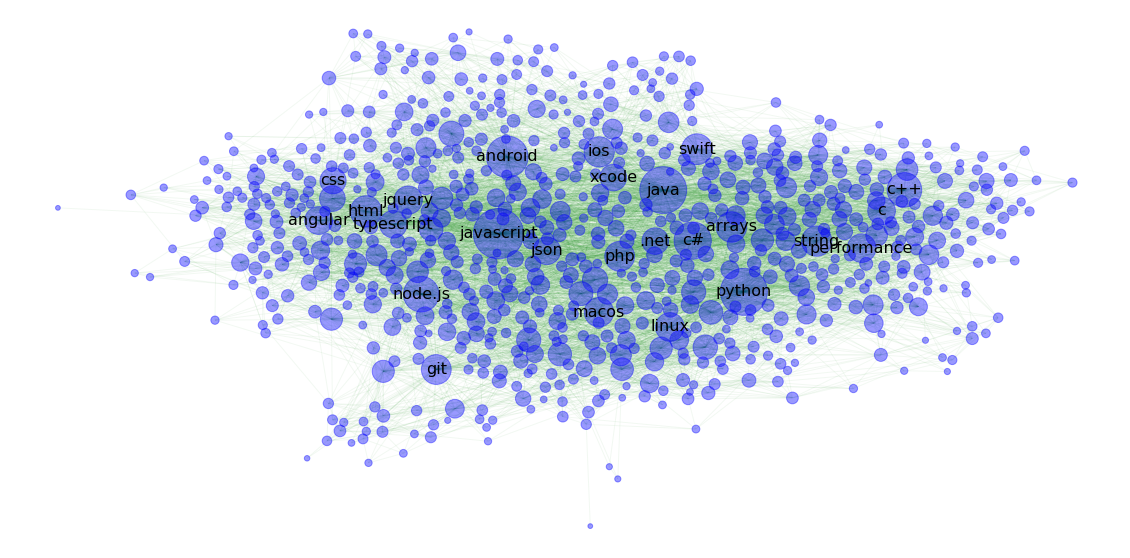

In [183]:
plt.figure(figsize=(20,10))

forceatlas2Small = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=False,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)
# Degree dictionary
degreeDict = dict(networkSmall.degree)
# The 25 largest nodes based on degree (needed for labels)
largestnodesSmall = dict(sorted(dict(networkSmall.degree()).items(), key=lambda item: item[1], reverse=True)[0:25])
# Label dictionary
nodelabelsSmall = {}
for key, value in largestnodesSmall.items():
    nodelabelsSmall[key] = key

# Positions on network
positionsSmall = forceatlas2Small.forceatlas2_networkx_layout(networkSmall, pos=None, iterations=4000)
# Draw nodes
nx.draw_networkx_nodes(networkSmall, positionsSmall, node_size=[rescale(v,2,650,15,5000) for v in degreeDict.values()], with_labels=False, node_color="blue", alpha=0.4)
# Draw edges
nx.draw_networkx_edges(networkSmall, positionsSmall, edge_color="green", alpha=0.05)
# Draw labels
labels = nx.draw_networkx_labels(networkSmall, positionsSmall, labels=nodelabelsSmall, font_color='k', font_size=16, font_weight='normal')

plt.axis('off')
plt.show()

There are some clear correlations between certain tag groups, for example the group at the top of the network. This group contains angular, css, html and jquery. All are highly related to frontend and web development.

Meanwhile a group of swift, ios, macos, xcode and linux have assembled on the right side. It seems Apple is such an important player in the world, that even our Stack Overflow network is affected by a single company. Linux has has snuck in there most as macos are both operating systems, and very similar to each other when compared to an OS like Microsoft.

Performance computing has a group at the bottom with C, C++, string and performance. C++ and C are often used for high performance computing (HPC), but string has most likely to do with strings in C and C++ being problematic to most newcommers of the languages.

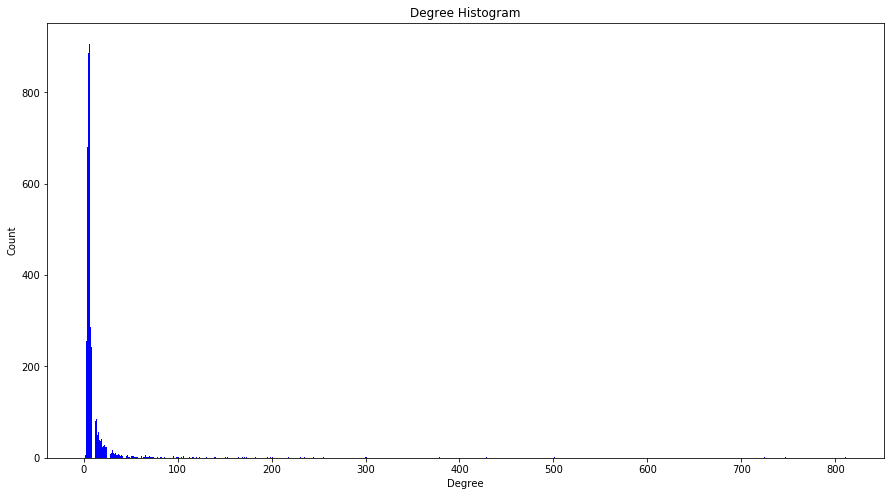

In [184]:
degree_sequence = sorted([d for n, d in network.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#plt.figure(figsize=(20,10))
#ax = plt.subplot()
fig, ax = plt.subplots(figsize=(15,8))

plt.bar(deg, cnt, width=0.80, color='b')



plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()


Based on the degree distribution, we can see that almost all tags have below 40 connections. So let's zoom in a bit.

In [188]:
above40count=0
totalcount=0
for k,v in degreeCount.items():
    #print(k)
    #print(v)
    totalcount+=v
    if k > 40:
        above40count+=v
print("Total above 40: ", above40count)
print("Percentage of all nodes: ", above40count/totalcount*100)
print("We will have" ,100 - (above40count/totalcount*100), "percent shown")

Total above 40:  169
Percentage of all nodes:  3.604179995734698
We will have 96.3958200042653 percent shown


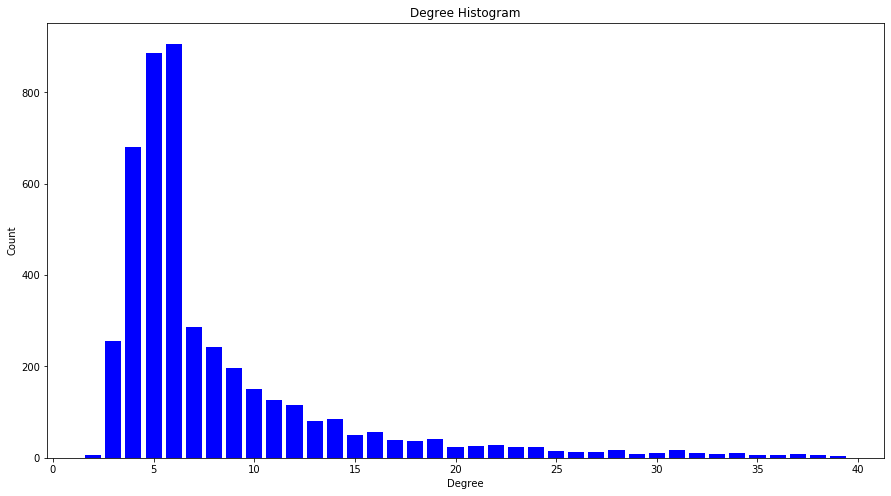

In [189]:
degree_sequence = sorted([d for n, d in network.degree() if d < 40], reverse=True)  # degree sequence

degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots(figsize=(15,8))

plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

It's very clear that most subject are only connected to approximately 5 or 6 other subjects. This could indicate that subjects on Stack Overflow are very secluded, and question are generally very specific. However it could also mean that a lot of programming subject do not share very many of the same problems. A language like C which has troublesome Strings (atleast for new programmers), does not share string issues with Java - a language which has simple String objects. 

# Score

## Total score regarding code tags. 

This section expands on how different tags receive a certain score. Notice though, that all questions are the questions with highest score per month. Top 100 each month. 
    
In the following, we find out what topics (tags) are the ones with the highest sum of score. On stack overflow, score is calculated by upvotes - downvotes. The score relates to the question in specific. A question with high score would mean it has either 1: been a problem for a lot of people, or 2: that it helped someone solve a problem also implying reason 1. We want to see what tags have the highest "help" rate and therefor probably also the highest traffic. We will use a barplot to illustrate the results.

In [9]:
allTagss = []

#for all jsons, go through each item and extract tags and score.
for json in jsons:
    for question in json['items']:
        allTags.append([question['tags'], question['score']])
        

In [ ]:
from collections import Counter
import re

#remove duplicate tags and do a slight trimming so e.g. different versions are not considered. 
allTagsSub = []

for i in range(len(allTags)):
    allTagsi = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in allTagss[i][0]]
    rmvdup = list(dict.fromkeys(allTagsi))
    allTagsSub.append([rmvdup, allTags[i][1]])
#tagDict = Counter(allTagsSub)

In [ ]:
tagScores = []

#For each tag, append its score (so instead of a list of tags having a score, each tag has the score from the given question)
for i in range(len(allTagsSub)):        
    for word in allTagsSub[i][0]:
        tagScores.append([word, allTagsSub[i][1]])
        

In [ ]:
tagScoresDict = {}

#sum of score of tags
for pair in tagScores:
    if pair[0] in tagScoresDict:
        tagScoresDict[pair[0]] = tagScoresDict[pair[0]]+pair[1]
    else:
        tagScoresDict[pair[0]] = pair[1] 

In [ ]:
#sort dictionary
sort_ts = sorted(tagScoresDict.items(), key=lambda kv: kv[1], reverse=True)

Make barplot of data using matplotlibs "bar" function.

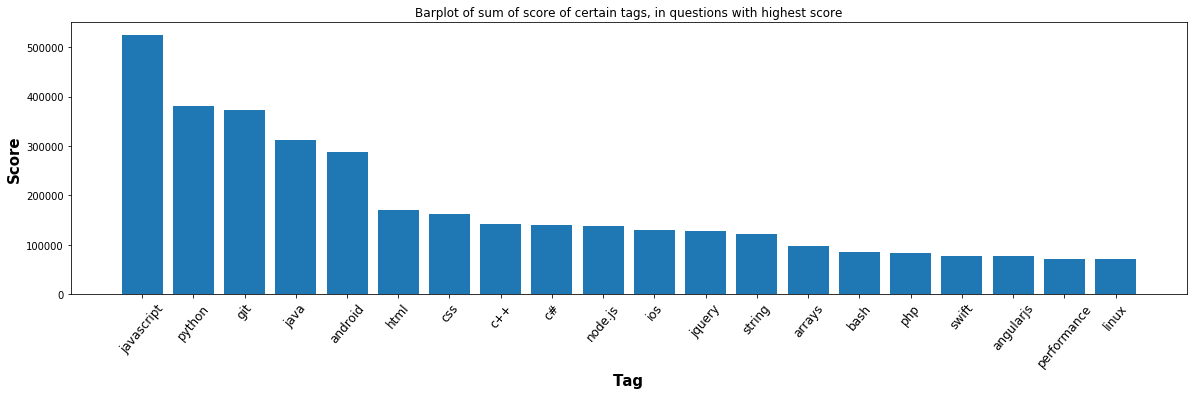

In [493]:
#plot top 20 items from dictionary

import matplotlib.pylab as plt
topn_items = sort_ts[0:20]
x, y =  zip(*topn_items)
plt.figure(figsize=(20,5))
plt.bar(x, y)
plt.xlabel('Tag', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15)
plt.title("Barplot of sum of score of certain tags, in questions with highest score")
plt.xticks(rotation = 50, fontsize=12)
plt.show()

From the plot we see that some very known code languages are the ones with by far the highest score. Javascript is apparantly the topic that is hottest, so to speak. Out of the most relevant nodes, javascript seem to dominate as the language having the most frequent problems with a good solution. Further down we see datastructures and other tags. The plot is an overall picture, over all 10 years of data, meaning this might not give a good picture for relevancy or "hotness" of a topic at this point in time. 

## Over time development of scores. Top scores per year.

Before we saw the overall picture, now we want to see how score develops over time. The idea is to see what 5 code languages accumulate the highest score each year for the 10 years of data. A colored barplot will be used to illustrate the results.

In [ ]:
tagScoresOT = {}

#make dictionary with keys being each year and values being list of information for the year.
for year in range(len(yearList)):
    tsYear = []
    for i in range(len(yearList[year])): 
        if (i % 2) == 0:
            for word in yearList[year][i]:
                    tsYear.append([word, yearList[year][i+1]])
    tagScoresOT[year] = tsYear

In [ ]:
tsdOT = {}

#tag scores dictionary over time
for year in tagScoresOT:
    tsdOTYear = {}
    for pair in tagScoresOT[year]:
        if pair[0] in tsdOTYear:
            tsdOTYear[pair[0]] = tsdOTYear[pair[0]]+pair[1]
        else:
            tsdOTYear[pair[0]] = pair[1]  
    tsdOT[year] = tsdOTYear      

In [ ]:
tsdOTsort = {}

#sort the dicionary in descending order
for year in tsdOT:
    sort_tsOT = sorted(tsdOT[year].items(), key=lambda kv: kv[1], reverse=True)
    tsdOTsort[year] = sort_tsOT 

After splitting the data into desired parts, we want to plot and label everything on a bar plot. The data will be grouped into 5 bars per year, indicating the top 5 scoring tags that year. A color indicates the rank. All top scoring tags will share a color and so on. Use matplotlibs function "bar" to make barplot. 

In [ ]:
# y-values
bars1 = []
bars2 = []
bars3 = []
bars4 = []
bars5 = []
labelsA = []
labels1 = []
labels2 = []
labels3 = []
labels4 = []
labels5 = []

#For each year, get the highest score and attach to a list with highest score of each year. Repeat for next highest score etc.
for j in range(5):
    for i in range(len(tsdOTsort)):    
        topn_itemsOT = tsdOTsort[i][j][1]
        topn_labels = tsdOTsort[i][j][0]
        if j == 0:
            bars1.append(topn_itemsOT)
            labels1.append(topn_labels)
        if j == 1:
            bars2.append(topn_itemsOT)
            labels2.append(topn_labels)
        if j == 2:
            bars3.append(topn_itemsOT)
            labels3.append(topn_labels)
        if j == 3:
            bars4.append(topn_itemsOT)
            labels4.append(topn_labels)
        if j == 4:
            bars5.append(topn_itemsOT)
            labels5.append(topn_labels)
            
#create list of labels. Hotfix with empty element as 6th element for spacing.            
for i in range(len(labels1)):
    labelsA.extend([labels1[i], labels2[i], labels3[i], labels4[i], labels5[i], (" ")])
        

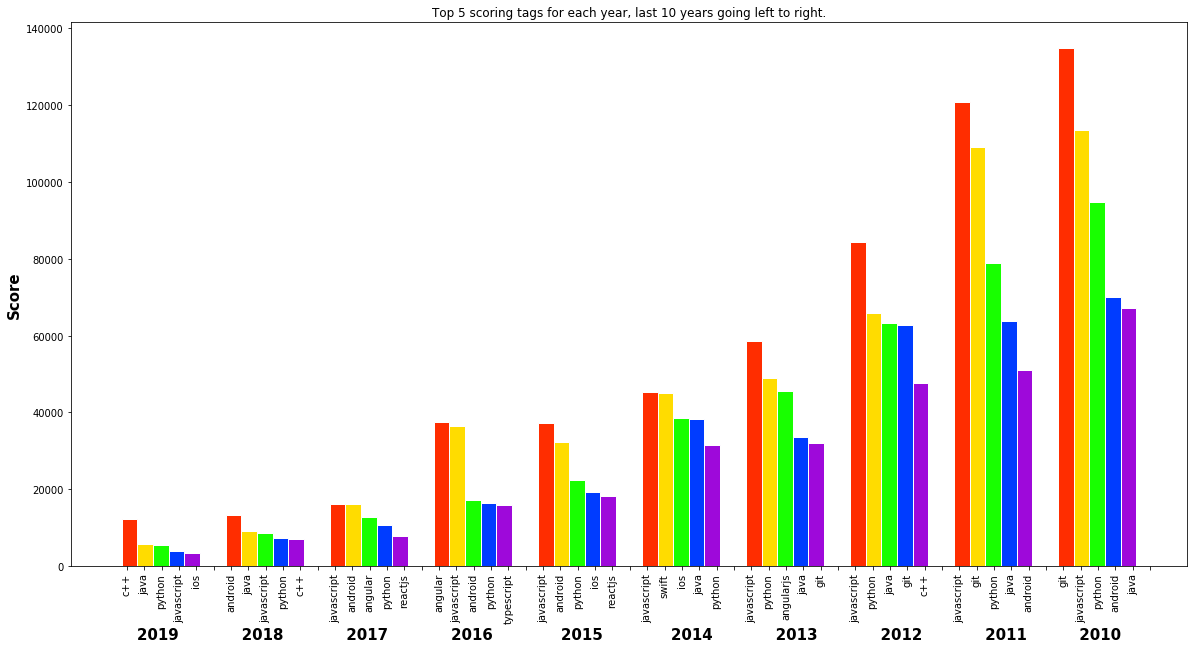

In [507]:
# set width of bar
barWidth = 0.15


# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


#plt.figure(figsize=(20,10))

fig, ax = plt.subplots(figsize=(20,10))

# Make the plot and color the bars
bar1 = plt.bar(r1, bars1, color='#FF2D00', width=barWidth, edgecolor='white', label=labels1)
bar2 = plt.bar(r2, bars2, color='#FFDC00', width=barWidth, edgecolor='white', label=labels2)
bar3 = plt.bar(r3, bars3, color='#18FF00', width=barWidth, edgecolor='white', label=labels3)
bar4 = plt.bar(r4, bars4, color='#003CFF', width=barWidth, edgecolor='white', label=labels4)
bar5 = plt.bar(r5, bars5, color='#9E09DA', width=barWidth, edgecolor='white', label=labels5)

    
# Add xticks on the middle of the group bars. 
plt.xlabel('2019            2018            2017            2016             2015             2014            2013            2012            2011          2010', fontweight='bold', fontsize=15)
plt.ylabel('Score', fontweight='bold', fontsize=15) 
plt.xticks([(r/6)-0.025 for r in range(len(bars1*6))], labelsA, rotation = 90)

            
# Show graphic. Legend is very hard to get a good read from, and is therefore left out. 
plt.title("Top 5 scoring tags for each year, last 10 years going left to right.")
plt.show()

Going back in time the scores are higher, due to more and more years of accumulating score. Javascript is the tag/language with highest score most often, which correlates with it being the tag with highest score overall aswell. 

We have chosen the 100 questions with highest score (opvotes - downvotes) on stack overflow per month. That creates a bias. However, this bias isn't bad, when what we are interested in is exactly popularity over time. Getting the most popular questions does cut a lot of questions, but as the lower scoring questions help a much smaller group of people, that question becomes less and less defining for the tag itself. When we want to characterize a tag, we want to do it by defining questions that are typical or especially relevant. 

# Examining question bodies

## Examine question body words for most "popular" tags

Examining following tags/languages: Javascript, python, git, android. These tags have helped the most people overall (sum of tag scores plot). And they're all present multiple times in the plot over time, indicating a constant relevancy. Also, having "git" and "android" in here could be interesting as they may refer to other things than just a code language itself. 

The words we will use to characterize the language come from the question "body". This contains answers to a question, and discuss solutions rather than problems within the topic. We want to generate wordclouds using TF-IDF analysis on each of the fused bodies. 

How trimming of the bodies is done will be described as it is done with in line code comments. Generally reg-exes are used, and made up to match exactly the kind of task we had in mind it should solve. The trimming is split into quite a lot of iterations as it is easier to keep an overview when doing one thing at a time. 

In [373]:
#lists with words of all bodies (answers to questions)

jsw = []
pw = []
gw = []
aw = []
jw = []

for json in Alljsons:
    for question in json['items']:
            if 'javascript' in question['tags']:
                jsw.append(question['body'])
            if 'python' in question['tags']:
                pw.append(question['body'])
            if 'git' in question['tags']:
                gw.append(question['body'])
            if 'android' in question['tags']:
                aw.append(question['body'])   
            if 'java' in question['tags']:
                jw.append(question['body'])   

In [374]:
import nltk
from nltk.corpus import stopwords
import re

stopwords = set(stopwords.words('english'))


#trim the bodies. Exclude links, everything in code snippets, words containing symbols, certain words regarding formatting,
#and all non alphabetical characters. 

def trimmer(wordlist):

    jsw0 = [''.join(wordlist[0 : len(wordlist)])] 

    jsw1 = re.sub('<\/?a(|\s+[^>]+)>', ' ', jsw0[0])  #exclude links
    jsw2 = jsw1.lower()
    jsw3 = re.sub(r'<code>(.*?)<\/code>', ' ', jsw2)  #exclude everything with code tags
    jsw4 = re.sub(r'(^| )[^ ]*[^A-Za-z ][^ ]*(?=$| )', ' ', jsw3)       #exclude words with symbols (html stuff)
    jsw5 = re.sub(r'[lg]t|new|class|public|return|void|code|static', ' ', jsw4)     #exclude certain formatting and code words
    jsw6 = re.sub(r'[^a-zA-Z]+ ', ' ', jsw5) #exclude symbols
    tokens = nltk.word_tokenize(jsw6)
    tokens1 = [word for word in tokens if len(word) > 2]  #exclude weird leftovers
    tokens2 = [word for word in tokens1 if not word in stopwords] #exclude stopwords

    return(tokens2)

#save tokens in new wordlists

tjsw = trimmer(jsw)
tpw = trimmer(pw)
tgw = trimmer(gw)
taw = trimmer(aw)
tjw = trimmer(jw)

In [471]:
#TF-IDF to make wordclouds for the 4 chosen tags 

from nltk import FreqDist


In [376]:
#Steps towards TF-IDF. Make frequency distribution of each body.
 
fdistjs = FreqDist(tjsw)
fdistp = FreqDist(tpw)
fdistg = FreqDist(tgw)
fdista = FreqDist(taw)
fdistj = FreqDist(tjw)

listjs = []
for word in fdistjs.most_common(len(tjsw)):
    listjs.append(word[0])
    
listp = []
for word in fdistp.most_common(len(tpw)):
    listp.append(word[0])  
    
listg = []
for word in fdistg.most_common(len(tgw)):
    listg.append(word[0]) 

lista = []
for word in fdista.most_common(len(taw)):
    lista.append(word[0]) 
    
listj = []
for word in fdistj.most_common(len(tjw)):
    listj.append(word[0])     
    
listJsPGAJ = listjs + listp + listg + lista + listj

In [377]:
#function for TF-IDF. Calculate the values for each word

import math

def TFIDF(fd, wordlist):
    ifn0 = []

    for word in fd.most_common(len(wordlist)):
        x = (math.log(2 / listJsPGAJ.count(word[0]))*int(word[1]) / len(wordlist))
        if x != 0:
            ifn0.append((word[0],x))
       
    tfidf = []
    for (word,number) in ifn0:
        tfidf.append((word, number * 1000000))             

    wc = []

    #roundt tfidf to nearest int for every word and put the word into the as many times as the value
    for (word,number) in tfidf:
        for i in range(int(number)):
            wc.append(word)
            
    return(wc) 


tijs = TFIDF(fdistjs,jsw)
tip = TFIDF(fdistp,pw)
tig = TFIDF(fdistg,gw)
tia = TFIDF(fdista,aw)    
tij = TFIDF(fdistj,jw)

In [378]:
#masks for wordclouds so they're shaped as icons. Some of these more successful than others

android_mask = np.array(Image.open("android_ikon.jpg"))

js_mask = np.array(Image.open("javascript_ikon.jpg"))

p_mask = np.array(Image.open("p_ikon.jpg"))

g_mask = np.array(Image.open("git-ikon2.jpg"))

j_mask = np.array(Image.open("java_ikon.jpg"))

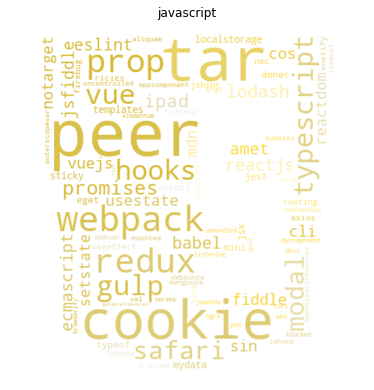

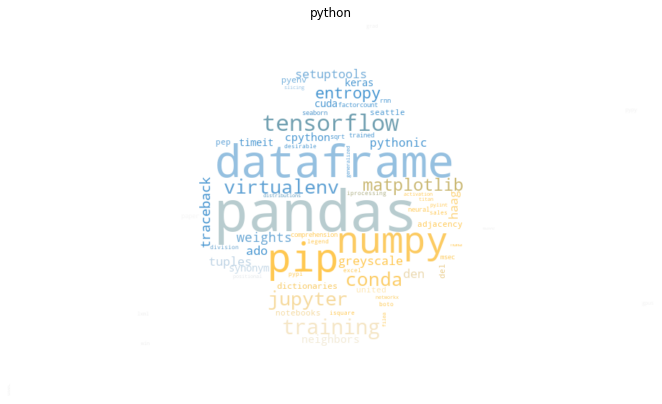

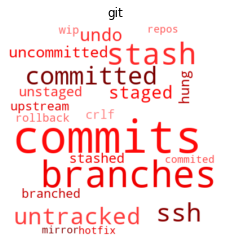

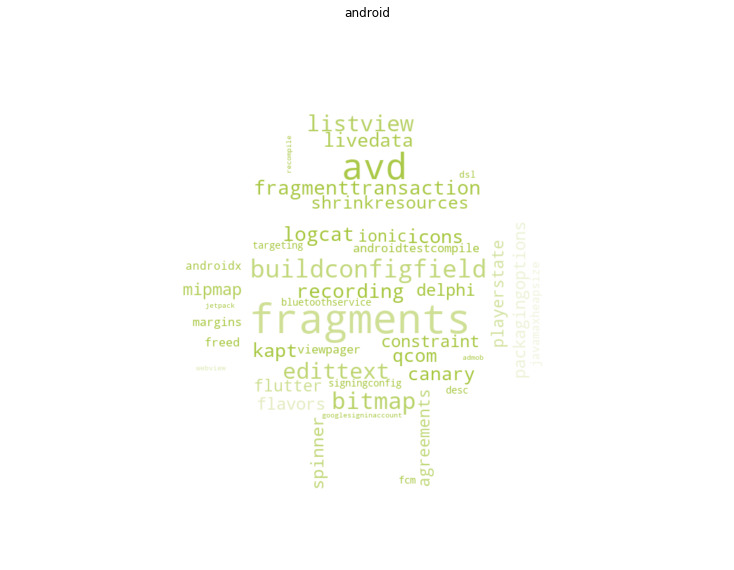

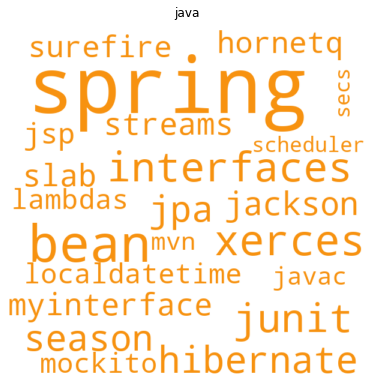

In [506]:
#Color for git wordcloud as it contained too little words to support an icon.
def red_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(0,100%%, %d%%)" % np.random.randint(20,80))


#List to string so it can be read by wordcloud
textjs = " ".join(word for word in tijs)
textp = " ".join(word for word in tip)
textg = " ".join(word for word in tig)
texta = " ".join(word for word in tia)
textj = " ".join(word for word in tij)


#Create wordclouds
wordcloudjs = WordCloud(collocations=False, background_color="white", mode="RGBA", max_words=100, mask=js_mask).generate(textjs)

image_colors = ImageColorGenerator(js_mask)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloudjs.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("javascript")


wordcloudp = WordCloud(collocations=False, background_color="white", mode="RGBA", max_words=100, mask=p_mask).generate(textp)

image_colors = ImageColorGenerator(p_mask)
plt.figure(figsize = (9, 9), facecolor = None) 
plt.imshow(wordcloudp.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("python")


wordcloudg = WordCloud(collocations=False, background_color="white", mode="RGBA", max_words=150, mask=g_mask).generate(textg)

image_colors = ImageColorGenerator(g_mask)
plt.figure(figsize = (3, 3), facecolor = None) 
plt.imshow(wordcloudg.recolor(color_func=red_color_func), interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("git")


wordclouda = WordCloud(collocations=False, background_color="white", mode="RGBA", max_words=100, mask=android_mask).generate(texta)

image_colors = ImageColorGenerator(android_mask)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordclouda.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("android")


wordcloudj = WordCloud(collocations=False, background_color="white", mode="RGBA", max_words=100, mask=j_mask, min_font_size=5).generate(textj)

image_colors = ImageColorGenerator(j_mask)
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloudj.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title("java")
plt.show()


From these wordclouds we see some very defining words for each tag. To name a few, the python cloud has words like "pandas", "numpy", "dataframe", which are all very characteristic and certainly something we've stumbled upon many times in this course. The mask to shape it and color the words looking like the icons are with mixed success. The java icon didn't seem to do us any good due to the coffe cup and vapor being quite thin lines, and we decided that orange was a color characterizing it just fine. Git contained too few words to make the form anything proper as well. However, the rest are quite cool. With this we did exactly what was set out to do: display words characterizing the most popular code language on stack overflow.

## Question network

This part will work with a smaller dataset, in attempt to display a network created within stack overflow. The network will consist of questions being nodes, and the tags used for each questions will be responsible for creating edges. If two questions share a tag, an edge should be created between them. Instead of the top 100 nodes each month for 10 years, there will be 10 nodes. Meaning these 10 nodes are the 10 "best" questions each month ranked by score. 

Yet again, we use the top 5 scoring tags from earlier, being javascript, python, git, android and java, to see how the network behaves. The modularity of these will be measured and compared to the modularity of the best partition of the whole network to just get some reference.
The network should be displayed using force atlas 2 and each of these 5 chosen communities will be colored, which hopefully will display hubs (or modules) clearly.

In [388]:
#list of jsons - from now and back in time, one month at a time each year starting 2019 nov.
AlljsonsShort = []


# variables
oneYear=86400*365
oneMonth=int(oneYear/12)
todate=1572998400
fromdate=1572998400-oneMonth

yearListShort = []


for i in range(1,11):
    print("i",i)
    year = []
    #file = open(r"C:\Users\daman\Desktop\Uni\Social-Graphs-project\stackoverflow-files\{}.txt".format(i), "w+")
    for ii in range (1,13):
        print("ii", ii)
        print("todate",todate,"fromdate",fromdate)
        query = "https://api.stackexchange.com//2.2/questions?pagesize=10&fromdate={}&todate={}&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y".format(fromdate,todate)
        response = urllib.request.urlopen(query)
        gzipFile = gzip.GzipFile(fileobj=response)
        src = gzipFile.read()
        stackjson = json.loads(src)
        
        jsonstr = json.dumps(stackjson)
        #file.write(jsonstr)
        AlljsonsShort.append(stackjson) #append to unified json list local
        for question in stackjson['items']:
            taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
            yearTags = (list(dict.fromkeys(taglist)))
            year.extend([yearTags, question['score']])
        
        todate-=oneMonth
        fromdate-=oneMonth
        
    yearListShort.append(year)
    #file.close()

i 1
ii 1
todate 1572998400 fromdate 1570370400
ii 2
todate 1570370400 fromdate 1567742400
ii 3
todate 1567742400 fromdate 1565114400
ii 4
todate 1565114400 fromdate 1562486400
ii 5
todate 1562486400 fromdate 1559858400
ii 6
todate 1559858400 fromdate 1557230400
ii 7
todate 1557230400 fromdate 1554602400
ii 8
todate 1554602400 fromdate 1551974400
ii 9
todate 1551974400 fromdate 1549346400
ii 10
todate 1549346400 fromdate 1546718400
ii 11
todate 1546718400 fromdate 1544090400
ii 12
todate 1544090400 fromdate 1541462400
i 2
ii 1
todate 1541462400 fromdate 1538834400
ii 2
todate 1538834400 fromdate 1536206400
ii 3
todate 1536206400 fromdate 1533578400
ii 4
todate 1533578400 fromdate 1530950400
ii 5
todate 1530950400 fromdate 1528322400
ii 6
todate 1528322400 fromdate 1525694400
ii 7
todate 1525694400 fromdate 1523066400
ii 8
todate 1523066400 fromdate 1520438400
ii 9
todate 1520438400 fromdate 1517810400
ii 10
todate 1517810400 fromdate 1515182400
ii 11
todate 1515182400 fromdate 151255440

In [389]:
import networkx as nx
import re

#create all question nodes with attributes desired. Use short list as the whole list has a very ugly visualization
#and the longer list contains lower scores, meaning less reelvancy for our project in specific. Using top 10 instead of 100
#should in this case still give some insight.

qn = nx.Graph()

for json in AlljsonsShort: 
    for question in json['items']:
        taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        duptags = (list(dict.fromkeys(taglist)))    
        qn.add_node(question['title'], ntags=duptags)


In [390]:
#add edges to question node network, if another node has a tag matching it. Intersection list to see what tags create most
#edges between nodes. 

#when creating an edge, if there isn't already one, add what created that edge to an "intersection" list, to see what 
#tag(s) was used when creating an edge.

intersectionList = []
prevEdge = []

for node_r, attributes1 in qn.nodes(data=True):
    tag_list1 = (attributes1.values()) 
    for node, attributes2 in qn.nodes(data=True):
        tag_list2 = (attributes2.values()) 
        if set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])) and node != node_r:
            if ([node_r, node, (set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))]) not in prevEdge:
                intersectionList.append(set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))
            prevEdge.append([node_r, node, (set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))])
            prevEdge.append([node, node_r, (set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))])
            qn.add_edge(node_r, node) 


In [391]:
qn.number_of_nodes()

1200

C:\Users\daman\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


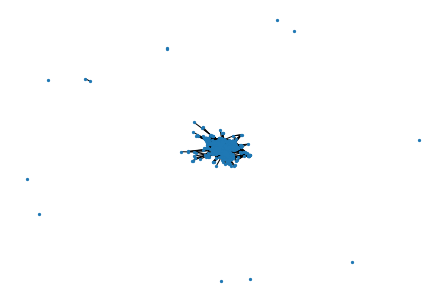

In [240]:
#draw to see if nodes are connected at all
nx.draw(qn, with_labels = False, node_size = 5)

Interestingly, some nodes doesn't share tag with any others, yet has a high enough score to make it to top 10 for some month.
Looking at these might be interesting, but is not within the scope of this part of the project. But we might aswell see what information one of the lone nodes contain.

In [498]:
smallest_cc = min(nx.connected_components(qn), key=len)
print(smallest_cc, qn.node['Can I list all standard Go packages?'])

{'Can I list all standard Go packages?'} {'ntags': ['go', 'go-packages']}


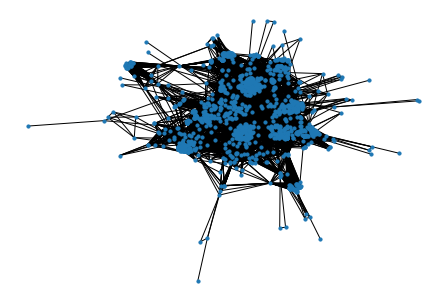

In [241]:
#use just connected components, as the relationship between these are what interests us, staying within scope.
largest_cc = max(nx.connected_component_subgraphs(qn), key=len)
nx.draw(largest_cc, node_size=10)

We see that nodes are in some form of clusters. To explore this further we want to visualize with force atlas, and color certain communities, and see if they happen to be contained within those clusters. This is done by another team member however. 

# Modularity for chosen communities

In [472]:
#Top 5 intersectors. Meaning top 5 tags and number of times creating an edge. This list is also used to calculate modularity,
#as modularity for just these 5 tags will be calculated considering the edges only attached nodes with the tag, rather than 
#every edge in the network.

IL = []

for element in intersectionList:
    for e in element:
        IL.append(e)

countIL = Counter(IL)
countIL.most_common(5)

[('javascript', 14878),
 ('python', 7021),
 ('git', 5050),
 ('android', 4851),
 ('java', 3655)]

If tags contain more of higher ranking tags, they get higher degree as seen below. Some tags seem to have higher impact/greater weight when it comes to degree: Javascript being the big culprit in this case, as every combination in top 10 contains that tag. The node with the highest degree also contains the top 2 intersectors.

In [473]:
#This top 50 contains tags frequently used to create or attempt to create edges with. 

print("Top 10 tag lists sorted by degree, starting with highest degree for tag list 1:")

degree = sorted(qn.degree, key=lambda x: x[1], reverse=True)
for i in range(50):
    print( "tag", i+1 ," degree:  " , 
            degree[i][1], qn.node[degree[i][0]] )

Top 10 tag lists sorted by degree, starting with highest degree for tag list 1:
tag 1  degree:   301 {'ntags': ['javascript', 'python', 'google-chrome', 'selenium', 'selenium-chromedriver']}
tag 2  degree:   264 {'ntags': ['javascript', 'html', 'angular', 'typescript', 'angular-ngmodelchange']}
tag 3  degree:   263 {'ntags': ['javascript', 'css', 'angular', 'angular-template', 'angular-ng-class']}
tag 4  degree:   242 {'ntags': ['javascript', 'ios', 'reactjs', 'react-native', 'ios-simulator']}
tag 5  degree:   234 {'ntags': ['javascript', 'angular', 'typescript', 'input']}
tag 6  degree:   231 {'ntags': ['javascript', 'html', 'css']}
tag 7  degree:   231 {'ntags': ['javascript', 'html', 'css', 'anchor', 'offset']}
tag 8  degree:   224 {'ntags': ['javascript', 'node.js', 'reactjs', 'react-state']}
tag 9  degree:   222 {'ntags': ['javascript', 'angular']}
tag 10  degree:   222 {'ntags': ['javascript', 'angular']}
tag 11  degree:   220 {'ntags': ['javascript', 'ios', 'safari']}
tag 12  de

Best partition and modularity of it using the giant connected component.

In [499]:
#best partition modularity with the network

partition = community.best_partition(largest_cc)

print(community.modularity(partition, largest_cc))

0.7258469491524294


In [504]:
#community detection in network
#counters for party sizes in congress, sum of degrees in communities and links within communities (parties). 

jsC = 0
pC = 0
gC = 0
aC = 0
jC = 0
DegreeSumjs = 0
DegreeSump = 0
DegreeSumg = 0
DegreeSuma = 0
DegreeSumj = 0      
LWDjs = 0
LWDp = 0
LWDg = 0
LWDa = 0
LWDj = 0
 
nfoundList = []    
    
for node in qn.node():
    nodes = qn.node[node]
    nfoundList.append(node)
    #append node to a list to say that the links for that node already have been found, only count links for other nodes
    nbn = [nodes for nodes in qn.neighbors(node) if not nodes in nfoundList]
    if ('javascript' in nodes['ntags']):
        #if given tag is in list, count one and add its degree to sum
        DegreeSumjs += qn.degree[node]
        jsC += 1    
        #for all the current nodes neighbors, see if they contain same tag, if so, add one. 
        for neighbor in nbn:
            neighborNode = qn.node[neighbor]
            if ('javascript' in neighborNode['ntags']):
                LWDjs += 1
                
    elif ('python' in nodes['ntags']):
        DegreeSump += qn.degree[node]
        pC += 1

        for neighbor in nbn:
            neighborNode = qn.node[neighbor]
            if ('python' in neighborNode['ntags']):
                LWDp += 1            

    elif ('git' in nodes['ntags']):
        DegreeSumg += qn.degree[node]
        gC += 1
        
        for neighbor in nbn:
            neighborNode = qn.node[neighbor]
            if ('git' in neighborNode['ntags']):
                LWDg += 1
                
    elif ('android' in nodes['ntags']):
        DegreeSuma += qn.degree[node]
        aC += 1
        
        for neighbor in nbn:
            neighborNode = qn.node[neighbor]
            if ('android' in neighborNode['ntags']):
                LWDa += 1
                
    elif ('java' in nodes['ntags']):
        DegreeSumj += qn.degree[node]
        jC += 1
        
        for neighbor in nbn:
            neighborNode = qn.node[neighbor]
            if ('java' in neighborNode['ntags']):
                LWDj += 1   
 

print("all numbers are given in the sequence: javascript, python, git, android, java \n")

print("number of nodes in each community:", jsC, pC, gC, aC, jC)

print("Degree sum:                       ", DegreeSumjs, DegreeSump, DegreeSumg, DegreeSuma, DegreeSumj)    
  
print("Links within community:           " , LWDjs, LWDp, LWDg, LWDa, LWDj)  

#print("number of total links (edges)", qn.number_of_edges())


all numbers are given in the sequence: javascript, python, git, android, java 

number of nodes in each community: 173 118 100 99 71
Degree sum:                        32525 14676 10403 11259 6593
Links within community:            14878 6941 4978 4851 3027


In [393]:
#Edges in chosen communities (javascript, python, git, android, java). These are sum of intersections with the chosen tags,
#in the intersection list created earlier along with the edges.

edgesCom = 0
for i in range(5):
    edgesCom += countIL.most_common(5)[i][1]

Calculating modularity for a select part of the network, means we only want edges relevant for that part, otherwise the modularity falsely is lowered. 

In [394]:
#Modularity calculated for the 5 highest scoring tags.

import math

def modl(lw, dgs):
    modularity = lw/edgesCom - math.pow((dgs/(2*edgesCom)),2)
    return(modularity)

modl(LWDjs, DegreeSumjs)+modl(LWDp, DegreeSump)+modl(LWDg, DegreeSumg)+modl(LWDa, DegreeSuma)+modl(LWDj, DegreeSumj)

0.739352179746977

Modularity is 0.74. Indicating quite strong communities in the top 5 tags. It is higher than any of the modularities measured in the earlier assignements. The best partition for the giant connected component in the network has a slightly smaller modularity. The latter being due to containing a lot of smaller and seemingly weaker communities. It seems that topics regarding code doesn't cross reference too much, or maybe don't have that similar problems. Atleast the tags are used in a way that makes it seem very clear what the question is in regards to showing a strength withing the forum. Maybe less popular questions would have more of a blur, and that could be a reason why they weren't scoring as high.

The modularity would be prone to changing quite quickly, as new posts with high score could have a large number of intertwining tags, lessening the modularity. But at the datas current state, this was the result. 

Some additional examination: what are the questions exactly of top 3 nodes scoring highest on degree, eigenvector centrality and betweenness centrality. 

In [419]:
#top 3 degrees for each of top 5 topics/tags

#counters to get top 4
counter1 = 0;
counter2 = 0;
counter3 = 0;
counter4 = 0;
counter5 = 0;


#arrays to hold top 3 for next part of exercise.
jsM = []
pM = []
gM = []
aM = []
jM = []


#Find degree for nodes in graph, sort and take 3 highest. Doing this for both republican and democrats after.
for i in range(len(qn.degree)):
    max_degree = sorted(qn.degree, key=lambda x: x[1], reverse=True)
    maxnode = qn.node[(max_degree[i])[0]]
    if 'javascript' in maxnode['ntags'] and counter1 < 3:
        counter1 += 1;
        print('javascript ', maxnode['ntags'], max_degree[i])  
        jsM.append((max_degree[i])[0])
        
for i in range(len(qn.degree)):
    max_degree = sorted(qn.degree, key=lambda x: x[1], reverse=True)
    maxnode = qn.node[(max_degree[i])[0]]
    if 'python' in maxnode['ntags'] and counter2 < 3:
        counter2 += 1;
        print('python ', maxnode['ntags'], max_degree[i])  
        pM.append((max_degree[i])[0])
        
for i in range(len(qn.degree)):
    max_degree = sorted(qn.degree, key=lambda x: x[1], reverse=True)
    maxnode = qn.node[(max_degree[i])[0]]
    if 'git' in maxnode['ntags'] and counter3 < 3:
        counter3 += 1;
        print('git ', maxnode['ntags'], max_degree[i])  
        gM.append((max_degree[i])[0]) 
        
for i in range(len(qn.degree)):
    max_degree = sorted(qn.degree, key=lambda x: x[1], reverse=True)
    maxnode = qn.node[(max_degree[i])[0]]
    if 'android' in maxnode['ntags'] and counter4 < 3:
        counter4 += 1;
        print('android ', maxnode['ntags'], max_degree[i])  
        aM.append((max_degree[i])[0])
        
for i in range(len(qn.degree)):
    max_degree = sorted(qn.degree, key=lambda x: x[1], reverse=True)
    maxnode = qn.node[(max_degree[i])[0]]
    if 'java' in maxnode['ntags'] and counter5 < 3:
        counter5 += 1;
        print('java ', maxnode['ntags'], max_degree[i])  
        jM.append((max_degree[i])[0])    
    

javascript  ['javascript', 'python', 'google-chrome', 'selenium', 'selenium-chromedriver'] ('Can a website detect when you are using selenium with chromedriver?', 301)
javascript  ['javascript', 'html', 'angular', 'typescript', 'angular-ngmodelchange'] ('(change) vs (ngModelChange) in angular', 264)
javascript  ['javascript', 'css', 'angular', 'angular-template', 'angular-ng-class'] ('Angular: conditional class with *ngClass', 263)
python  ['javascript', 'python', 'google-chrome', 'selenium', 'selenium-chromedriver'] ('Can a website detect when you are using selenium with chromedriver?', 301)
python  ['python', 'git', 'pip'] ('pip install from git repo branch', 218)
python  ['python', 'c++', 'benchmarking', 'iostream', 'getline'] ('Why is reading lines from stdin much slower in C++ than Python?', 189)
git  ['python', 'git', 'pip'] ('pip install from git repo branch', 218)
git  ['ios', 'xcode', 'git'] ('New file created in Xcode 9.3, &lt;wsname&gt;.xcworkspace/xcshareddata/IDEWorkspaceC

In [469]:
# top 3 degree of chosen tags's eigenvector centrality 
vcentrality = nx.eigenvector_centrality(qn)  

def evc(M):
    for question in M:
        print(question, "eigenvector val:", vcentrality[question])
        
evc(jsM)
evc(pM)
evc(gM)
evc(pM)
evc(jM)

Can a website detect when you are using selenium with chromedriver? eigenvector val: 0.07668350732511607
(change) vs (ngModelChange) in angular eigenvector val: 0.07710635043954056
Angular: conditional class with *ngClass eigenvector val: 0.07692653912314205
Can a website detect when you are using selenium with chromedriver? eigenvector val: 0.07668350732511607
pip install from git repo branch eigenvector val: 0.002271201369937105
Why is reading lines from stdin much slower in C++ than Python? eigenvector val: 0.0023824027469519483
pip install from git repo branch eigenvector val: 0.002271201369937105
New file created in Xcode 9.3, &lt;wsname&gt;.xcworkspace/xcshareddata/IDEWorkspaceChecks.plist should it be committed? eigenvector val: 0.0015701393020084093
Git is not working after macOS Update (xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools) eigenvector val: 0.0006715968446070075
Can a website detect when you are using selenium with chromedriver? eige

In [505]:
# top 3 degree of chosen tags's betweeneness centrality 
bcentrality = nx.betweenness_centrality(qn)  

def evc(M):
    for question in M:
        print(question, "betweenness val:", bcentrality[question])
        
evc(jsM)
evc(pM)
evc(gM)
evc(pM)
evc(jM)

Can a website detect when you are using selenium with chromedriver? betweenness val: 0.06263407474220682
(change) vs (ngModelChange) in angular betweenness val: 0.020391981652581184
Angular: conditional class with *ngClass betweenness val: 0.015555359315822935
Can a website detect when you are using selenium with chromedriver? betweenness val: 0.06263407474220682
pip install from git repo branch betweenness val: 0.034602147457381306
Why is reading lines from stdin much slower in C++ than Python? betweenness val: 0.015646144917099383
pip install from git repo branch betweenness val: 0.034602147457381306
New file created in Xcode 9.3, &lt;wsname&gt;.xcworkspace/xcshareddata/IDEWorkspaceChecks.plist should it be committed? betweenness val: 0.012359740734080797
Git is not working after macOS Update (xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools) betweenness val: 0.021027941941049
Can a website detect when you are using selenium with chromedriver? betweenn

It is quite hard to get a good read, so heres a summary of what happens: All top 3's for each tag is the same regardless of measure. That these vertex characteristics are giving the same highest scoring nodes, might have something to do with the high modularity. Each of the tags are in a quite strong community, and the central questions will typically score high on multiple parameters if any when nodes within the community have few references to nodes outside the community. E.g. if a node has a high degree in this case, it means it will likely be a more central node, meaning others "pass over it" if we were to travel from one node to the ones in the outter rim of the communty. 

And apparantly, others had some of the same problems as students of this course could have, as "pip install from git repo branch" is the highest scoring question from python on all 3 measured parameters. 

## Title analysis

We now look into which questions or problems each which programming languages has. The question resembles a direct problem and the words will be calculated based on how many times that word was used within a question for that language. By looking at each question, we take the tags used and group them together in a tuple with the title. This is done for every question title. We look at the 5 most used words in the title of each tag. We have here choosen a few tags that we want to look at. These are python, javascript, git and android. 

In [1]:
#Import the required libraries
import urllib.request
import json
import gzip
import shutil

In [2]:
#Query for the stackexchange API
query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate=1543881600&todate=1572998400&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y"

Printing the result for test purpose, so we can see what the dataset looks like.

In [3]:
response = urllib.request.urlopen(query)
gzipFile = gzip.GzipFile(fileobj=response)
src = gzipFile.read()
stackjson = json.loads(src)
stackjson

{'items': [{'tags': ['javascript', 'type-conversion'],
   'owner': {'reputation': 3346,
    'user_id': 6271167,
    'user_type': 'registered',
    'profile_image': 'https://lh6.googleusercontent.com/-Li2nn19VvNw/AAAAAAAAAAI/AAAAAAAAGM8/FfH9SwLK4oY/photo.jpg?sz=128',
    'display_name': 'HV Sharma',
    'link': 'https://stackoverflow.com/users/6271167/hv-sharma'},
   'is_answered': True,
   'view_count': 70614,
   'protected_date': 1565789081,
   'accepted_answer_id': 57456236,
   'answer_count': 8,
   'score': 564,
   'last_activity_date': 1572283544,
   'creation_date': 1565589043,
   'last_edit_date': 1566689071,
   'question_id': 57456188,
   'body_markdown': 'I was practicing some JavaScript when one of my friends came across this JavaScript code:\r\n\r\n&lt;!-- begin snippet: js hide: false console: true babel: false --&gt;\r\n\r\n&lt;!-- language: lang-js --&gt;\r\n\r\n    document.write((&#39;b&#39; + &#39;a&#39; + + &#39;a&#39; + &#39;a&#39;).toLowerCase());\r\n\r\n&lt;!-- end 

We now pull all the questions from stackoverflow

In [5]:
#list of jsons
jsons = []

# variables
oneYear=86400*365
oneMonth=int(oneYear/12)
todate=1572998400
fromdate=1572998400-oneMonth
for i in range(1,11):
    print("i",i)
    for ii in range (1,13):
        print("ii", ii)
        print("todate",todate,"fromdate",fromdate)
        query = "https://api.stackexchange.com//2.2/questions?pagesize=100&fromdate={}&todate={}&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y".format(fromdate,todate)
        response = urllib.request.urlopen(query)
        gzipFile = gzip.GzipFile(fileobj=response)
        src = gzipFile.read()
        stackjson = json.loads(src)
        jsons.append(stackjson)
        todate-=oneMonth
        fromdate-=oneMonth

i 1
ii 1
todate 1572998400 fromdate 1570370400
ii 2
todate 1570370400 fromdate 1567742400
ii 3
todate 1567742400 fromdate 1565114400
ii 4
todate 1565114400 fromdate 1562486400
ii 5
todate 1562486400 fromdate 1559858400
ii 6
todate 1559858400 fromdate 1557230400
ii 7
todate 1557230400 fromdate 1554602400
ii 8
todate 1554602400 fromdate 1551974400
ii 9
todate 1551974400 fromdate 1549346400
ii 10
todate 1549346400 fromdate 1546718400
ii 11
todate 1546718400 fromdate 1544090400
ii 12
todate 1544090400 fromdate 1541462400
i 2
ii 1
todate 1541462400 fromdate 1538834400
ii 2
todate 1538834400 fromdate 1536206400
ii 3
todate 1536206400 fromdate 1533578400
ii 4
todate 1533578400 fromdate 1530950400
ii 5
todate 1530950400 fromdate 1528322400
ii 6
todate 1528322400 fromdate 1525694400
ii 7
todate 1525694400 fromdate 1523066400
ii 8
todate 1523066400 fromdate 1520438400
ii 9
todate 1520438400 fromdate 1517810400
ii 10
todate 1517810400 fromdate 1515182400
ii 11
todate 1515182400 fromdate 151255440

Printing all titles, and responding tags from stackoverflow as a tuple.

In [6]:
allTitles = []
for json in jsons:
    for question in json['items']:
        allTitles.append([question['tags'], question['title']]) 
print(allTitles)

[[['ios', 'swift', 'xcode', 'uitextview', 'xcode11.2'], 'After upgrading to Xcode 11.2 from Xcode 11.1, app crashes due to _UITextLayoutView'], [['bash', 'git', 'macos', 'zsh', 'macos-catalina'], 'Git doesn&#39;t work on MacOS Catalina: &quot;xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing&quot;'], [['xcode', 'macos', 'macos-catalina'], 'MobileDevice.pkg untrusted, cannot open Xcode after OS X update'], [['c', 'scanf'], 'What can I use for input conversion instead of scanf?'], [['python', 'boolean-logic'], 'Is there a more elegant way to express ((x == a and y == b) or (x == b and y == a))?'], [['python', 'tensorflow', 'keras', 'performance-testing', 'tensorflow2.0'], 'Why is TensorFlow 2 much slower than TensorFlow 1?'], [['c', 'linux', 'assembly', 'mmap'], 'Unexpected exec permission from mmap when assembly files included in the project'], [['ios', 'objective-c', 'wkwebview'], 'Why I get the console warning: [Process] kill() returned unexpec

We now exclude certain things from the result by using regular expressions and tokenzing the words in the tuple. We remove certain words since they would not help in explaining the particular problems regarding the language. These are words like error, fail and find which is often mentioned in questions regarding problems.

In [7]:
import re
from nltk import word_tokenize
import nltk
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('english')

allTitlesSub = []
finalList = []

for i in range(len(allTitles)):
    allTitlesi = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in allTitles[i][0]]
    allTitlesSub.append([allTitlesi, allTitles[i][1]])

for j in range(len(allTitlesSub)):
    tokens = word_tokenize(allTitlesSub[j][1].lower())
    tokens2 = [re.sub(r'[^a-z]+', '', x) for x in tokens]
    tokens3 = [w for w in tokens2 if w.lower() not in stopwords]
    tokens4 = [w for w in tokens3 if w.lower() not in '']
    tokens5 = [w for w in tokens4 if w.lower() not in 'quot']
    tokens6 = [w for w in tokens5 if w.lower() not in 'using']
    tokens7 = [w for w in tokens6 if w.lower() not in 'get']
    tokens8 = [w for w in tokens7 if w.lower() not in 'error']
    tokens9 = [w for w in tokens8 if w.lower() not in 'failed']
    tokens10 = [w for w in tokens9 if w.lower() not in 'get']
    tokens11 = [w for w in tokens10 if w.lower() not in 'use']
    tokens12 = [w for w in tokens11 if w.lower() not in 'find']
    tokens13 = [w for w in tokens12 if len(w) > 2]
    finalList.append([allTitlesSub[j][0], tokens13])

    
print(finalList)

[[['ios', 'swift', 'xcode', 'uitextview', 'xcode'], ['upgrading', 'xcode', 'xcode', 'app', 'crashes', 'due', 'uitextlayoutview']], [['bash', 'git', 'macos', 'zsh', 'macos-catalina'], ['git', 'work', 'macos', 'catalina', 'xcrun', 'invalid', 'active', 'developer', 'path', 'librarydevelopercommandlinetools', 'missing']], [['xcode', 'macos', 'macos-catalina'], ['mobiledevicepkg', 'untrusted', 'open', 'xcode', 'update']], [['c', 'scanf'], ['input', 'conversion', 'instead', 'scanf']], [['python', 'boolean-logic'], ['elegant', 'way', 'express']], [['python', 'tensorflow', 'keras', 'performance-testing', 'tensorflow'], ['tensorflow', 'much', 'slower', 'tensorflow']], [['c', 'linux', 'assembly', 'mmap'], ['unexpected', 'exec', 'permission', 'mmap', 'assembly', 'files', 'included', 'project']], [['ios', 'objective-c', 'wkwebview'], ['console', 'warning', 'process', 'kill', 'returned', 'unexpected', 'load', 'wkwebview', 'ios']], [['android', 'cordova', 'ionic-framework', 'ionic', 'build.gradle'],

We now have a tuple of tokens from of the tags used, and the words used in the problem title. We create a dictionary to link every tag that has the word mentioned over in the tuple with each other. So if xcode in mentioned in tag mac and osx, it will get into the words part of these tags in the tuple ([tag], [words])

In [9]:
thisdict = {}

for (tags,title) in finalList:
    for tag in tags:
        if tag in thisdict.keys():
            keyValue = thisdict.get(tag)
            keyValue.extend(title)
        else:
            thisdict[tag] = title

In [10]:
import nltk
from nltk import FreqDist

for key in thisdict:
    fdist = FreqDist(thisdict.get(key))
    print(key, fdist.most_common(5))

ios [('swift', 454), ('xcode', 444), ('ios', 360), ('app', 108), ('bar', 70)]
swift [('swift', 454), ('xcode', 444), ('ios', 360), ('app', 108), ('bar', 70)]
xcode [('swift', 454), ('xcode', 444), ('ios', 360), ('app', 108), ('bar', 70)]
uitextview [('swift', 454), ('xcode', 444), ('ios', 360), ('app', 108), ('bar', 70)]
bash [('git', 449), ('branch', 117), ('commit', 100), ('bash', 90), ('file', 76)]
git [('git', 449), ('branch', 117), ('commit', 100), ('bash', 90), ('file', 76)]
macos [('git', 449), ('branch', 117), ('commit', 100), ('bash', 90), ('file', 76)]
zsh [('git', 449), ('branch', 117), ('commit', 100), ('bash', 90), ('file', 76)]
macos-catalina [('git', 449), ('branch', 117), ('commit', 100), ('bash', 90), ('file', 76)]
c [('function', 21), ('code', 14), ('pointer', 13), ('array', 11), ('loop', 10)]
scanf [('function', 21), ('code', 14), ('pointer', 13), ('array', 11), ('loop', 10)]
python [('python', 518), ('pandas', 137), ('list', 100), ('pip', 89), ('dataframe', 87)]
boo

android-package-managers [('file', 3), ('list', 1), ('apps', 1), ('users', 1), ('information', 1)]
android-multiple-users [('file', 3), ('list', 1), ('apps', 1), ('users', 1), ('information', 1)]
android-work-profile [('file', 3), ('list', 1), ('apps', 1), ('users', 1), ('information', 1)]
smart-pointers [('std', 11), ('move', 7), ('vector', 4), ('sharedptr', 4), ('uniqueptr', 2)]
stdvector [('std', 11), ('move', 7), ('vector', 4), ('sharedptr', 4), ('uniqueptr', 2)]
move-semantics [('std', 11), ('move', 7), ('vector', 4), ('sharedptr', 4), ('uniqueptr', 2)]
autofill [('autofill', 2), ('input', 1), ('text', 1), ('small', 1), ('hovering', 1)]
function-declaration [('function', 1), ('pointer', 1), ('parameter', 1), ('without', 1), ('asterisk', 1)]
backwards-compatibility [('aggregate', 1), ('initialization', 1), ('work', 1), ('anymore', 1), ('since', 1)]
c++-concepts [('concepts', 3), ('requires', 2), ('multiple', 1), ('types', 1), ('constraint', 1)]
android-workmanager [('backup', 1), (

windows-subsystem-for-linux [('redis', 12), ('windows', 6), ('bash', 4), ('ubuntu', 3), ('system', 2)]
ajax [('ajax', 20), ('jquery', 15), ('request', 8), ('form', 6), ('post', 6)]
recaptcha [('ajax', 20), ('jquery', 15), ('request', 8), ('form', 6), ('post', 6)]
gdb [('gdb', 3), ('macos', 2), ('recognized', 1), ('executable', 1), ('file', 1)]
sprite-kit [('shader', 1), ('performance', 1), ('data', 1), ('maybe', 1), ('unavailable', 1)]
random-seed [('javautilrandom', 1), ('really', 1), ('random', 1), ('generate', 1), ('factorial', 1)]
java.util.random [('javautilrandom', 1), ('really', 1), ('random', 1), ('generate', 1), ('factorial', 1)]
language-agnostic [('array', 4), ('language', 2), ('condition', 2), ('matched', 2), ('process', 2)]
negation [('array', 4), ('language', 2), ('condition', 2), ('matched', 2), ('process', 2)]
appstore-approval [('appstore', 1), ('connect', 1), ('missing', 1), ('purpose', 1), ('string', 1)]
char [('char', 7), ('string', 4), ('std', 2), ('convert', 2), (

prettier [('code', 9), ('format', 3), ('studio', 2), ('formatting', 2), ('editor', 2)]
v-for [('vue', 1), ('loop', 1), ('via', 1), ('vfor', 1), ('times', 1)]
psql [('psql', 6), ('postgresql', 3), ('postgres', 2), ('schema', 2), ('list', 2)]
shortcut [('studio', 3), ('android', 2), ('ios', 1), ('shortcut', 1), ('jumping', 1)]
null-coalescing-operator [('operator', 4), ('null', 2), ('expression', 1), ('tree', 1), ('lambda', 1)]
sticky [('sticky', 2), ('position', 1), ('element', 1), ('flexbox', 1)]
javafx-webengine [('javafx', 2), ('google', 1), ('maps', 1), ('amp', 1), ('display', 1)]
preflight [('accesscontrolalloworigin', 1), ('header', 1), ('present', 1), ('requested', 1), ('resourcewhen', 1)]
right-to-left [('code', 1), ('written', 1), ('backwards', 1), ('print', 1), ('hello', 1)]
android-asynctask [('asynctask', 4), ('android', 4), ('class', 2), ('thread', 2), ('warning', 1)]
android-runonuithread [('asynctask', 4), ('android', 4), ('class', 2), ('thread', 2), ('warning', 1)]
armv 

telegram-bot [('telegram', 1), ('bot', 1), ('group', 1), ('chat', 1)]
nsdata [('convert', 3), ('uiimage', 2), ('nsdata', 2), ('back', 1), ('swift', 1)]
msysgit [('git', 9), ('windows', 5), ('bash', 5), ('msys', 4), ('msysgit', 3)]
mingw [('git', 9), ('windows', 5), ('bash', 5), ('msys', 4), ('msysgit', 3)]
msys [('git', 9), ('windows', 5), ('bash', 5), ('msys', 4), ('msysgit', 3)]
xcode-ui-testing [('testing', 2), ('failure', 1), ('neither', 1), ('element', 1), ('descendant', 1)]
instantiation [('instance', 1), ('member', 1), ('used', 1), ('type', 1), ('faster', 1)]
getter-setter [('instance', 1), ('member', 1), ('used', 1), ('type', 1), ('faster', 1)]
preference-v [('preferencefragmentcompat', 1), ('requires', 1), ('preferencetheme', 1), ('set', 1)]
pdb [('right', 1), ('way', 1), ('debug', 1), ('ipython', 1), ('notebook', 1)]
web-applications [('difference', 3), ('nodejs', 2), ('module', 2), ('web', 2), ('spring', 1)]
binary-reproducibility [('two', 1), ('binaries', 1), ('programs', 1

ldap-query [('ldap', 1), ('search', 1)]
git-commands [('please', 1), ('enter', 1), ('commit', 1), ('message', 1), ('explain', 1)]
angularjs-ng-show [('difference', 1), ('ngif', 1), ('ngshownghide', 1), ('angularjs', 1), ('ngrepeat', 1)]
angularjs-ng-if [('difference', 1), ('ngif', 1), ('ngshownghide', 1), ('angularjs', 1), ('ngrepeat', 1)]
turbolinks [('rails', 1), ('document', 1), ('ready', 1), ('turbolinks', 1)]
fragmentpageradapter [('difference', 1), ('fragmentpageradapter', 1), ('fragmentstatepageradapter', 1)]
fragmentstatepageradapter [('difference', 1), ('fragmentpageradapter', 1), ('fragmentstatepageradapter', 1)]
quotes [('quotes', 7), ('single', 5), ('bash', 2), ('double', 2), ('need', 1)]
google-api [('google', 2), ('api', 2), ('invalidclient', 1), ('application', 1), ('name', 1)]
google-apps [('google', 2), ('api', 2), ('invalidclient', 1), ('application', 1), ('name', 1)]
dao [('data', 1), ('access', 1), ('object', 1), ('dao', 1), ('java', 1)]
github-services [('github', 

record [('last', 1), ('records', 1), ('mongodb', 1)]
android-install-apk [('build', 1), ('apk', 1), ('file', 1), ('eclipse', 1)]
text-styling [('set', 1), ('font', 1), ('style', 1), ('bold', 1), ('italic', 1)]
pull-to-refresh [('implement', 1), ('android', 1), ('pulltorefresh', 1)]
target [('create', 1), ('links', 1), ('target', 1), ('blank', 1), ('markdown', 1)]
new-window [('create', 1), ('links', 1), ('target', 1), ('blank', 1), ('markdown', 1)]
stack-trace [('stack', 3), ('trace', 3), ('exception', 2), ('description', 1), ('caused', 1)]
underline [('css', 1), ('box', 1), ('shadow', 1), ('bottom', 1), ('remove', 1)]
zoom [('disable', 2), ('safari', 2), ('viewport', 1), ('zooming', 1), ('mobile', 1)]
beyondcompare [('configure', 1), ('visual', 1), ('studio', 1), ('beyond', 1), ('compare', 1)]
nsinteger [('nsinteger', 1), ('int', 1)]
character-arrays [('string', 1), ('character', 1), ('array', 1), ('javascript', 1)]
alarmmanager [('alarm', 1), ('manager', 1), ('example', 1)]
rule-of-t

We know find the words most common words used in the title for the tags we mentioned above. These were javascript, android, git, python and java. We print the 11 most frequent words, since the code language itself is at the top of every word. We therefore get the top 10 words.

In [22]:
#Javascript
#Android
#Git
#Python
#Java
key = 'javascript'
fdist = FreqDist(thisdict.get(key))
print(key, fdist.most_common(11))
key = 'android'
fdist = FreqDist(thisdict.get(key))
print(key, fdist.most_common(11))
key = 'git'
fdist = FreqDist(thisdict.get(key))
print(key, fdist.most_common(11))
key = 'python'
fdist = FreqDist(thisdict.get(key))
print(key, fdist.most_common(11))
key = 'java'
fdist = FreqDist(thisdict.get(key))
print(key, fdist.most_common(11))

javascript [('javascript', 280), ('array', 115), ('react', 91), ('chrome', 90), ('function', 89), ('object', 88), ('jquery', 76), ('string', 66), ('difference', 57), ('angular', 55), ('nodejs', 50)]
android [('android', 531), ('studio', 97), ('app', 77), ('gradle', 62), ('google', 47), ('file', 47), ('recyclerview', 41), ('sdk', 38), ('apk', 38), ('could', 36), ('version', 36)]
git [('git', 449), ('branch', 117), ('commit', 100), ('bash', 90), ('file', 76), ('remote', 61), ('repository', 57), ('mac', 46), ('command', 46), ('files', 45), ('github', 45)]
python [('python', 518), ('pandas', 137), ('list', 100), ('pip', 89), ('dataframe', 87), ('string', 73), ('file', 71), ('install', 70), ('difference', 50), ('module', 49), ('column', 48)]
java [('java', 494), ('method', 67), ('difference', 66), ('string', 61), ('android', 57), ('jdk', 53), ('class', 49), ('spring', 45), ('stream', 44), ('convert', 39), ('type', 36)]


We now plot the most 10 used words from the title questions in word wheels to show the most common problems for each language. The reason for not using the body question as opposed to the title is, that the title itself litterly is the problem people want answered.

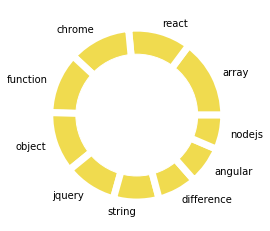

In [13]:
import matplotlib.pyplot as plt

names='array', 'react', 'chrome', 'function','object', 'jquery', 'string', 'difference', 'angular','nodejs'
size=[115,91,90,89,88,76,66,57,55,50]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#F0DB4F'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The most common problems for javascript regards array, react, chrome, function, object and jquery. These are all really basic components of javascript.

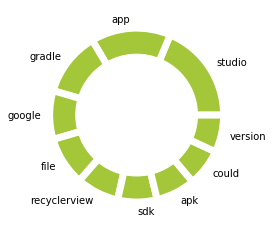

In [15]:
import matplotlib.pyplot as plt


names='studio', 'app', 'gradle', 'google', 'file', 'recyclerview', 'sdk', 'apk', 'could','version'
size=[97,77,62,47,47,41,38,38,36,36]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#A4C639'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The most common problems for android regards studio, app, gradle, google and file. All these are common andorid components.

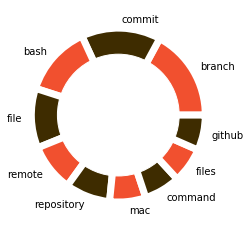

In [16]:
import matplotlib.pyplot as plt

names='branch', 'commit', 'bash', 'file', 'remote', 'repository', 'mac', 'command', 'files', 'github'
size=[117,101,90,76,61,57,46,46,45,45]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#F1502F', '#3E2C00'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The most common problems for git regards branch commit bash remote reposirty mac

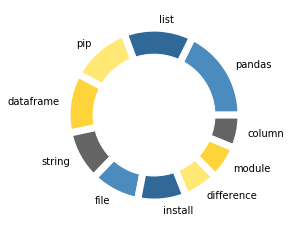

In [17]:
import matplotlib.pyplot as plt

names='pandas', 'list', 'pip', 'dataframe', 'string', 'file', 'install', 'difference', 'module','column'
size=[137,100,89,87,73,71,70,50,49,48]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#4B8BBE', '#306998','#FFE873','#FFD43B','#646464'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

We see that the top 10 words for python are: pandas list pip dataframe string install

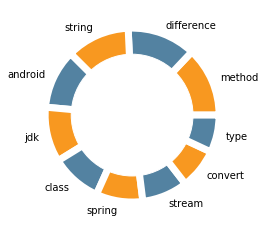

In [18]:
import matplotlib.pyplot as plt

names='method','difference','string','android','jdk','class','spring','stream','convert','type'
size=[67,66,61,57,53,49,45,44,39,36]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')

plt.pie(size, labels=names, wedgeprops = { 'linewidth' : 7, 'edgecolor' : 'white' }, colors=['#f89820', '#5382a1'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

The top words for java are method, difference, string, android, jdk and class. All really basic components.

As we saw, all the words in the word wheels are basic and fundemental components of that language. We excludeded the language itself which is seen as the most used word by far for every tag, since it does not say anything about the problems of the language. Note that these problems are overly common and generic since a lot of new people to the language would make questions regarding these. These are also some of the most integrated and basic aspects of that language, and makes language what it is. That means that not a lot of fancy or really hard aspects of the language will actually be shows in the word wheels.

## Communities

We now look into communities within stack overflow. Only the popular tags are looked into, which were javascript (yellow), android (green), git (red), python (blue) and java (orange). We want to see how these communities behave and how strong they are.

The modularity of the 5 tags is 0.74. This is a high modularity, meaning that we will see dense connections between the nodes in the groups, and sparse connection between the other groups.

In [9]:
#list of jsons - from now and back in time, one month at a time each year starting 2019 nov.
AlljsonsShort = []


# variables
oneYear=86400*365
oneMonth=int(oneYear/12)
todate=1572998400
fromdate=1572998400-oneMonth

yearListShort = []


for i in range(1,11):
    print("i",i)
    year = []
    #file = open(r"C:\Users\daman\Desktop\Uni\Social-Graphs-project\stackoverflow-files\{}.txt".format(i), "w+")
    for ii in range (1,13):
        print("ii", ii)
        print("todate",todate,"fromdate",fromdate)
        query = "https://api.stackexchange.com//2.2/questions?pagesize=10&fromdate={}&todate={}&order=desc&sort=votes&site=stackoverflow&filter=!9Z(-wwK0y".format(fromdate,todate)
        response = urllib.request.urlopen(query)
        gzipFile = gzip.GzipFile(fileobj=response)
        src = gzipFile.read()
        stackjson = json.loads(src)
        
        jsonstr = json.dumps(stackjson)
        #file.write(jsonstr)
        AlljsonsShort.append(stackjson) #append to unified json list local
        for question in stackjson['items']:
            taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
            yearTags = (list(dict.fromkeys(taglist)))
            year.extend([yearTags, question['score']])
        
        todate-=oneMonth
        fromdate-=oneMonth
        
    yearListShort.append(year)
    #file.close()

i 1
ii 1
todate 1572998400 fromdate 1570370400
ii 2
todate 1570370400 fromdate 1567742400
ii 3
todate 1567742400 fromdate 1565114400
ii 4
todate 1565114400 fromdate 1562486400
ii 5
todate 1562486400 fromdate 1559858400
ii 6
todate 1559858400 fromdate 1557230400
ii 7
todate 1557230400 fromdate 1554602400
ii 8
todate 1554602400 fromdate 1551974400
ii 9
todate 1551974400 fromdate 1549346400
ii 10
todate 1549346400 fromdate 1546718400
ii 11
todate 1546718400 fromdate 1544090400
ii 12
todate 1544090400 fromdate 1541462400
i 2
ii 1
todate 1541462400 fromdate 1538834400
ii 2
todate 1538834400 fromdate 1536206400
ii 3
todate 1536206400 fromdate 1533578400
ii 4
todate 1533578400 fromdate 1530950400
ii 5
todate 1530950400 fromdate 1528322400
ii 6
todate 1528322400 fromdate 1525694400
ii 7
todate 1525694400 fromdate 1523066400
ii 8
todate 1523066400 fromdate 1520438400
ii 9
todate 1520438400 fromdate 1517810400
ii 10
todate 1517810400 fromdate 1515182400
ii 11
todate 1515182400 fromdate 151255440

In [10]:
import networkx as nx
import re

#create all question nodes with attributes desired. Use short list as the whole list has a very ugly visualization
#and the longer list contains lower scores, meaning less reelvancy for our project in specific. Using top 10 instead of 100
#should in this case still give some insight.

qn = nx.Graph()

for json in AlljsonsShort: 
    for question in json['items']:
        taglist = [re.sub(r"(-)*(\d)+(\..)*","",tag) for tag in question['tags']]
        duptags = (list(dict.fromkeys(taglist)))    
        qn.add_node(question['title'], ntags=duptags)

In [11]:
#add edges to question node network, if another node has a tag matching it. Intersection list to see what tags create most
#edges between nodes. 

intersectionList = []
prevEdge = []

for node_r, attributes1 in qn.nodes(data=True):
    tag_list1 = (attributes1.values()) 
    for node, attributes2 in qn.nodes(data=True):
        tag_list2 = (attributes2.values()) 
        if set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])) and node != node_r:
            if ([node_r, node, (set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))]) not in prevEdge:
                intersectionList.append(set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))
            prevEdge.append([node_r, node, (set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))])
            prevEdge.append([node, node_r, (set(list(tag_list1)[0]).intersection(set(list(tag_list2)[0])))])
            qn.add_edge(node_r, node)

In [12]:
largest_cc = max(nx.connected_component_subgraphs(qn), key=len)

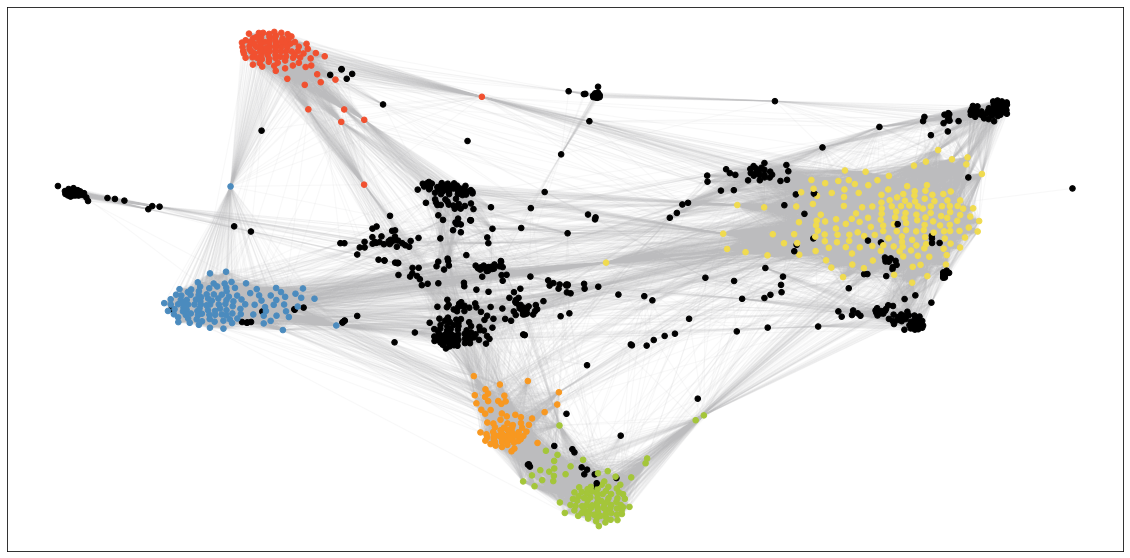

In [49]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

colorMap1 = []

for node in largest_cc.node():
    nodes = largest_cc.node[node]
    if ('javascript' in nodes['ntags']):
        colorMap1.append('#F0DB4F')
    elif ('python' in nodes['ntags']):
        colorMap1.append('#4B8BBE')
    elif ('git' in nodes['ntags']):
        colorMap1.append('#F1502F')
    elif ('android' in nodes['ntags']):
        colorMap1.append('#A4C639')
    elif ('java' in nodes['ntags']):
        colorMap1.append('#f89820')
    else:
        colorMap1.append('black')
        
forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,

                        # Tuning
                        scalingRatio=2.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=False)

plt.figure(figsize=(20,10))
pos = forceatlas2.forceatlas2_networkx_layout(largest_cc, iterations=2000)
nx.draw_networkx_nodes(largest_cc, pos, node_color=colorMap1, node_size=30)
nx.draw_networkx_edges(largest_cc, pos, edge_color='#bcbcbe', edge_size=0.5, alpha = 0.1)
plt.show()

As seen, the 5 tags proves as really strong communities. This is a non-overlapping community which has a lot of dense connections internally between the 5 most popular tags, but sparse connections between the groups. Though as seen there is a hint of a overlapping community, like the android and java groups which both share a smaller community as seen. They share a lot of dense connections between both groups, but also internally. These are also some nodes that play a strong intermediate role between groups, meaning they have a lot if not almost all of the connections between two groups. These could be outlier questions which regards both the tags of one from the top 5. The visualizaiton relates well to the high modularity.

# Discussion

There are some things we still wish to have had done. This is to look at the title questions over time and see if there is something fundemental that changes. This would be to see if the problems on stackoverflow change over time regarding the specific tags/programming language, or if it is always the same problems and fundemental concepts that is asked about. Here we possibly would be able to see if there were new concepts or applications which were introduced regarding the tags/programming language. We would also have liked to look into questions coming from low scores on stack overflow. This would enable us to see if these questions are different than the high scoring ones. We would like to look into if these were more in depth and regarding specific concepts of the tag/programming language. The low score could come from not many people having that specific problem, where we saw the high scoring questions having fundemental and basic questions regarding the programming language or applicaition. Ex. python has problems regarding pandas, list, pip and dataframes. Git has problems regarding branch and commit. These are all really basic concepts.

Overall a lot of things went well. We were able to get into a lot of depth regarding the analysis of stack overflow. We saw how the questions titles describe the basic concepts of language and which problems people typically have. By the use of TF-IDF, we also saw imporants words to the specific language. We also saw how popular the languages were over time. Furthermore we saw that stack overflow has some really strong communities.

# Contributions

Contributions are given by headlines in analysis: 
    
    
Mads:    

Data download,
Tag popularity,
Tag network.


Simon:

Score,
Examining question bodies,
Question network,
Modularity for chosen communities.


Jakob:
Title analysis.